Practical Project for Airbnb Open Data

# Exploratory Data Analysis

# Data Science Project (Airbnb Tutorial Data)

- Github Link: [Practical-Project-for-Airbnb-Open-Data.pdf]()
- Colab Link: [Practical-Project-for-Airbnb-Open-Data.ipynb](https://colab.research.google.com/drive/1xUeS_hPeF2Zrs31_Q_AKBoRKP0sOk8kd?usp=sharing)
- Kaggle Link: [Airbnb Open Data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data)

# An Exploratory Data Analysis through Detailing Airbnb Open Data containing Real Estate Property & Rental Accommodation Reviews and Ratings

# Dataset

## ATTRIBUTE CLASSIFICATION OF THE DATASET

### Host Identifier (AirBnb_Open_Data.csv)

- 1.INT.1 id A Machine identifier of the listing
- 2.INT.2 host id A mMachine Identifier of the host

### Description Line for Accommodation, a Sub Attribute (AirBnb_Open_Data.csv)

- 3.TEXT.1 NAME A Description in a single line format for the accommodation for which rating and price are provided
- 4.TEXT.2 house_rules Rules for the housing accommodation

### Main Categorical Attributes (AirBnb_Open_Data.csv)

- 5.CATEGORICAL.1 host_identifier_verified Denotes whether the host identifier is verified
- 6.CATEGORICAL.2 host name Name of the host
- 7.CATEGORICAL.1 neighbourhood group A Locality or neighbourhood city, town or place for the accommodation
- 8.CATEGORICAL.2 neighbourhood Locality in the Neighbourhood
- 9.CATEGORICAL.3 country Country Name
- 10.CATEGORICAL.4 country code Country Code for the Country
- 11.CATEGORICAL.5 cancellation policy Policy for the cancellation of accommodation
- 12.CATEGORICAL.6 room type A Type for the Room rented
- 13.CATEGORICAL.7 Construction year The Year of Construction
- 14.CATEGORICAL.8 instant_bookable Denotes whether the accommodation is bookable instantly
- 15.CATEGORICAL.9 license The License Details

### Geographical Measures (Airbnb_Open_Data.csv)

- 16.FLOAT.1 lat The latitude of the location
- 17.FLOAT.2 long The Longitude of the location

### Review Specific Date Information (Airbnb_Open_Data.csv)

- 18.DATE.1 last review The Date of the Last Review

### Numerical Measures (AirBnb_Open_Data.csv)

- 19.INT.1 service fee The Service Fee
- 20.INT.2 minimum nights Minimum Number of Nights Spend
- 21.INT.3 number of reviews Number of Reviews
- 22.FLOAT.4 reviews per month Reviews per Month
- 23.INT.4 review rate number Rating A rating score for the reviews of the accommodation
- 24.INT.5 calculated host listings count The count of calculated host listings
- 25.INT.6 availability 365 The Availability Days of the Accommodation in the Market over a Year

### Price (AirBnb_Open_Data.csv)

- 26.INT.1 Price The Price of the rented property

The dataset is a structured dataset of Airbnb Open Data Reviews and Ratings.

The dataset is part of Kaggle dataset [Airbnb Open Data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data).

## Theory

The Boston Housing Dataset prices are dependent on number of bedroom which is obviously missing in this scenario but could depend on service fee. The prices are also dependent on number of schools in the locality but in the rented prices there is no information on schools.

This creates another tension that may be additional data could be collected through an internet search applied to the Neighbourhood Group.

We form 8-10 Research Questions (RQs) for Exploratory Data Analysis of the Dataset.

# 0.1 Initial Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
from IPython.display import SVG, Image
from shapely.geometry import Point, Polygon
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle, Circle

## - UTILITY FUNCTIONS

**Plotting Utility Functions**

In [3]:
def setup_gridspec__one_main__two_side_subplots(plt):
    '''
    A grid plot with One Main Plot and 2 Side Plots that returns a grid, axes and figure
    @param plt: Matplotlib PyPlot Class
    @return: dict()
    '''
    # start with a square Figure
    fig = plt.figure(figsize=(16, 16))
    fig.tight_layout(pad=2.0)

    gs = fig.add_gridspec(2, 2,  width_ratios=(7,4), height_ratios=(3,7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.15, hspace=0.15)
    ax_0_0 = fig.add_subplot(gs[1,0])

    ax1_histx = fig.add_subplot(gs[0, 0], sharex=ax_0_0)
    ax1_histy = fig.add_subplot(gs[1, 1], sharey=ax_0_0)

    return {"gridspec": gs, "ax": ax_0_0, "axx": ax1_histx, "axy": ax1_histy, "fig": fig}

def setup_gridspec__four_main__two_side_subplots(plt):
    '''
    A grid plot with Four Main Plot and 2 Side Plots Each that returns a grid, axes and figure
    @param plt: Matplotlib PyPlot Class
    @return: dict()
    '''
    # start with a square Figure
    fig = plt.figure(figsize=(12, 16))
    fig.tight_layout(pad=5.0)

    gs = fig.add_gridspec(4, 4,  width_ratios=(8,3,8,3), height_ratios=(3,7,3,7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.15, hspace=0.15)
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 2])
    ax3 = fig.add_subplot(gs[3, 0])
    ax4 = fig.add_subplot(gs[3, 2])

    axx1 = fig.add_subplot(gs[0, 0], sharex=ax1)
    axy1 = fig.add_subplot(gs[1, 1], sharey=ax1)

    axx2 = fig.add_subplot(gs[0, 2], sharex=ax2)
    axy2 = fig.add_subplot(gs[1, 3], sharey=ax2)

    axx3 = fig.add_subplot(gs[2, 0], sharex=ax3)
    axy3 = fig.add_subplot(gs[3, 1], sharey=ax3)

    axx4 = fig.add_subplot(gs[2, 2], sharex=ax4)
    axy4 = fig.add_subplot(gs[3, 3], sharey=ax4)

    return {"gridspec": gs, "ax": (ax1,ax2,ax3,ax4), "axx": (axx1, axx2, axx3, axx4),
            "axy": (axy1, axy2, axy3, axy4), "fig": fig}

def plot_loadings_plot(plt, X_pca, df, ax, eigen_vectors=(0,1,2,3,4)):
    '''
    Loadings Plot using Matplotlib
    Plots Loadings or Eigen vectors in dimension 1 and dimension 2 for all columns supplied into the function
    @param plt: Matplotlib PyPlot Class
    @param X_pca: Transformed PCA Array
    @param df: The original DataFrame
    @param ax: Matplotlib Axis
    @param eigen_vectors: Selected Eigen Vectors to display on the Loadings Plot
    @return: None
    '''
    # obtain color palette
    palette = np.array(sns.color_palette("hls", 10))
    # Features x Dimensions, eigen vector is a column matrix, loadings for arrow plotting
    loadings = pc.T
    # plot eigen vectors
    arrow_size, text_pos = 1.0, 1.12
    for ii,i in enumerate(eigen_vectors):
        ax.arrow(0,0,arrow_size*loadings[i,0], arrow_size*loadings[i,1], color = palette[ii],head_width=0.01, head_length=0.01, linewidth=2, alpha=0.4)
        ax.text(loadings[i,0]*text_pos, loadings[i,1]*text_pos, df.columns[i], color='black',
                 ha='center', va='center', fontsize=12, alpha=0.65)

    return None

**Helper Utility Functions**

In [4]:
# Make zero mean for the dataframe
def demean_data(X_df):
    '''
    Demeaning the data
    @param X_df: Pandas DataFrame or Series
    @return: pd.DataFrame()
    '''
    return (X_df - X_df.mean(axis=0))

# returns transformed x, prin components, var explained
def principal_components_analysis(data):
    '''
    Principal Components Analysis conducted on Data by:
        1. demeaning the Data
        2. Symmetrisation of Input Matrix
        3. Calculating Eigen Values and Eigen Vectors
        4. Transforming to PCA Space by multiplying by Eigen Vectors
        5. Calculating Explained Variance
        6. Ordering the Results by Explained Variance
    @param data: pd.DataFrame Data consisting of original data
    @return: tuple()
    '''
    # get the original dimensions of a matrix
    dimensions = data.shape[1]
    # make zero mean of matrix
    z = demean_data(data)
    # make a matrix symmetric, invertible
    symmetric_matrix = make_a_matrix_symmetric_invertible(z)
    # find eigen values and eigen vectors
    (eigenvalues, eigenvectors) = np.linalg.eig(symmetric_matrix)  # 'right-hand'
    # returns transformed matrix
    transformed_matrix = pca_transformed(z, eigenvectors, dimensions)
    # find the principal components
    pc = eigenvectors.T
    # find explained variances
    explained_variance = np.var(transformed_matrix, axis=0, ddof=1)  # col sample var
    # take the sum of variances to 1 degree
    sum_of_variances = np.sum(explained_variance)
    # normalise the variances (take the ratio)
    explained_variance_ratio = explained_variance / sum_of_variances
    # order everything based on explained variance ratio
    ordering = np.argsort(explained_variance_ratio)[::-1]
    # order the transformed matrix
    transformed_matrix = transformed_matrix[:,ordering]
    pc = pc[ordering,:]
    explained_variance_ratio = explained_variance_ratio[ordering]
    return transformed_matrix, pc, explained_variance_ratio

# this code will make a non-square matrix a square matrix, a symmetric matrix as well as an invertible matrix if the determinant is non-zero
def make_a_matrix_symmetric_invertible(z):
    '''
    Symmetrising the Input Data
    @param z: Input Data
    @return: np.array
    '''
    return np.dot(z.T, z)

# get the transformed matrix space
def pca_transformed(z, eigenvectors, dimensions):
    '''
    Transforming the Input Data to PCA Space
    @param z: Input Data
    @param eigenvectors: Eigen vectors of Input data
    @param dimensions: Dimensions Required
    @return: np.array
    '''
    return np.dot(z, eigenvectors[:,0:dimensions])

## 0.2 Import the Dataset

In [ ]:
data = pd.read_csv("https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/Airbnb_Open_Data.csv")

df = data.drop(columns=['price'])
target = data['price']

<ipython-input-3-2189de1a8704>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/Airbnb_Open_Data.csv")


### 0.3 See Top 10 Rows

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307
NAME,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt
host id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483
host_identity_verified,unconfirmed,verified,NaN,unconfirmed,verified,verified,NaN,unconfirmed,verified,unconfirmed
host name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl
neighbourhood group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [ ]:
## see top 10 rows of the target dataframe

target.head(10).T

,price
0,$966
1,$142
2,$620
3,$368
4,$204
5,$577
6,$71
7,"$1,060"
8,"$1,018"
9,$291


### 0.4 See Bottom 10 Rows

In [ ]:
df.tail(10).T

,102589,102590,102591,102592,102593,102594,102595,102596,102597,102598
id,6089676,6090228,6090781,6091333,6091885,6092437,6092990,6093542,6094094,6094647
NAME,Lrg room 1 block from Prospect Park,Wonderful artists' loft in Brooklyn,Columbus Ave Apt 1 block from Park,3BR/1 Ba in TriBeCa w/ outdoor deck,"Welcoming, Clean, Cheap on St Marks",Spare room in Williamsburg,Best Location near Columbia U,"Comfy, bright room in Brooklyn",Big Studio-One Stop from Midtown,585 sf Luxury Studio
host id,74549151787,9184535139,50908010324,53266862889,33188605074,12312296767,77864383453,69050334417,11160591270,68170633372
host_identity_verified,unconfirmed,unconfirmed,verified,unconfirmed,verified,verified,unconfirmed,unconfirmed,unconfirmed,unconfirmed
host name,Dave,Daniel,Lawrence,Nick,Felipe,Krik,Mifan,Megan,Christopher,Rebecca
neighbourhood group,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Brooklyn,Manhattan,Brooklyn,Queens,Manhattan
neighbourhood,Flatbush,Crown Heights,Upper West Side,Tribeca,East Village,Williamsburg,Morningside Heights,Park Slope,Long Island City,Upper West Side
lat,40.65231,40.66673,40.77408,40.71845,40.72826,40.70862,40.8046,40.67505,40.74989,40.76807
long,-73.96189,-73.96127,-73.98181,-74.01183,-73.98422,-73.94651,-73.96545,-73.98045,-73.93777,-73.98342
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [ ]:
## see bottom 10 rows

target.tail(10)

,price
102589,$306
102590,$250
102591,"$1,139"
102592,$787
102593,"$1,099"
102594,$844
102595,$837
102596,$988
102597,$546
102598,"$1,032"


### Total Number of Rows in the Dataset

In [ ]:
data.count()

,0
id,102599
NAME,102349
host id,102599
host_identity_verified,102310
host name,102193
neighbourhood group,102570
neighbourhood,102583
lat,102591
long,102591
country,102067


### Checking for Duplicates

In [ ]:
# printing the duplicated rows of data in input features
data[data.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# Removing Duplicates

In [ ]:
data = data.drop(index=data[data.duplicated()].index)
df = data.drop(columns=['price'])
target = data['price']
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


## Checking the attribute information of the Dataset

In [ ]:
# checking attribute information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

## Checking dtypes

In [ ]:
# checking the dtypes
data.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


## Checking for missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


### Plotting all missing values in a heatmap to make the 39 attributes list in columns in a heatmap

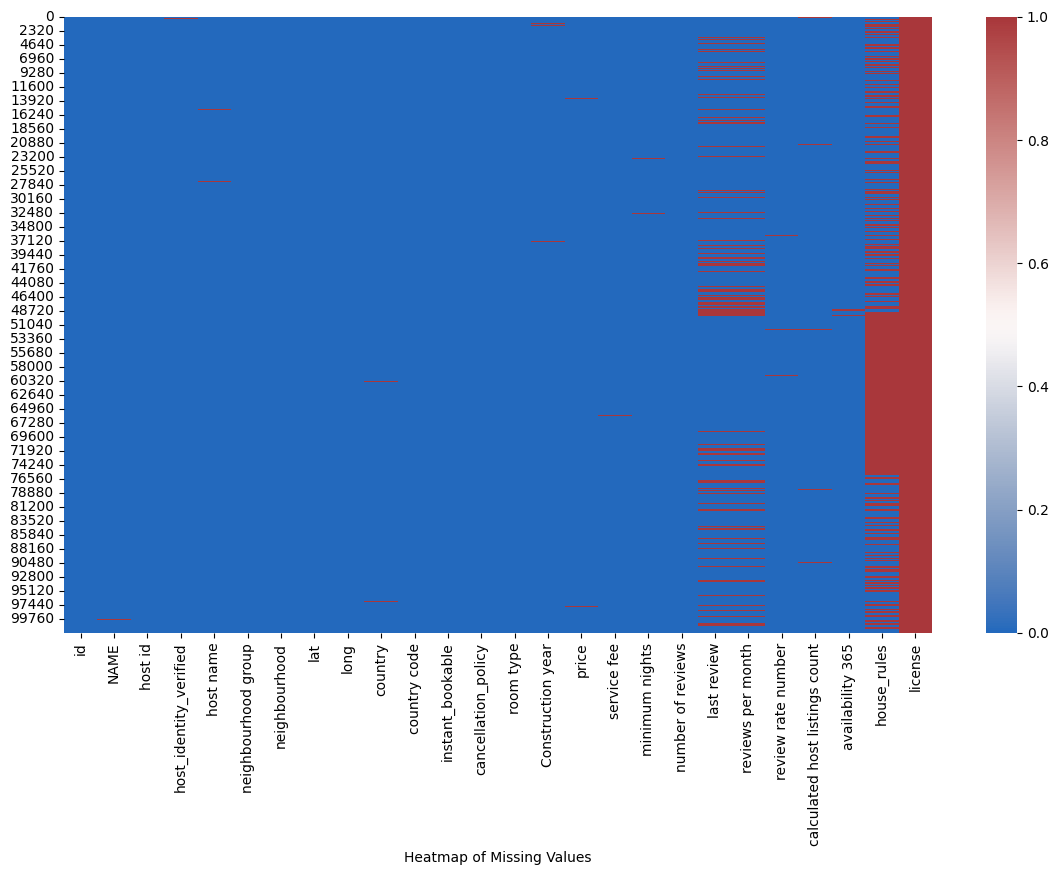

In [ ]:
# plotting all missing values in a heatmap to make the 39 attributes list in columns in a heatmap
fig = plt.figure(figsize=(14,8))
sns.heatmap(data.isnull(), cbar=True, cmap="vlag")
plt.xlabel("Heatmap of Missing Values")
plt.show()

### Filtering Attributes by the Amount of missing values (Null values Count ~ Missing Values Count)

In [ ]:
## filtering attributes by the amount of missing values

data.isnull().sum()[data.isnull().sum() < 541]

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


### Imputable Attributes and Droppable Attributes

In [ ]:
## Imputable Attributes and Droppable Attributes

droppable_attributes = ['NAME', 'host name', 'price']
imputable_attributes = ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'lat', 'lng', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'Construction year', 'service fee', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count', 'availability 365']

### Dropping attributes

In [ ]:
data.drop(columns=['NAME', 'host name'], inplace=True)

### Dropping Price Rows

In [ ]:
# dropping price rows where it is null
data.drop(index=data[data.price.isnull()].index, inplace=True)
data.count()

,0
id,101811
host id,101811
host_identity_verified,101526
neighbourhood group,101783
neighbourhood,101796
lat,101803
long,101803
country,101284
country code,101685
instant_bookable,101711


**Imputing attributes is after the EDA Research Questions, for Price Prediction.**

## Checking for unique values in the Dataset

In [ ]:
# checking for unique values
data.nunique()

,0
id,101811
host id,101810
host_identity_verified,2
neighbourhood group,7
neighbourhood,224
lat,21979
long,17754
country,1
country code,1
instant_bookable,2


## Assigning correct dtypes to the Dataset

In [ ]:
data.dtypes

,0
id,int64
host id,int64
host_identity_verified,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object
country code,object
instant_bookable,object


In [ ]:
data = data.astype({'host_identity_verified': 'category', 'neighbourhood group': 'category', 'neighbourhood': 'category'})
data = data.astype({'country': 'category', 'country code': 'category', 'instant_bookable': 'category', 'cancellation_policy': 'category', 'room type': 'category', 'Construction year': 'float64'})

### Replacing '$' in price and service fee to ''

**Replacing inside Microsoft Excel and renaming the file to be 'Airbnb_Open_Data_modified.csv'**

In [5]:
data = pd.read_csv("https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/Airbnb_Open_Data_modified.csv")
data.price

<ipython-input-5-c5dd6aaadf14>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/Airbnb_Open_Data_modified.csv")


,price
0,966.0
1,142.0
2,620.0
3,368.0
4,204.0
...,...
102594,844.0
102595,837.0
102596,988.0
102597,546.0


## Meaningful Impute of Attributes (Data Cleaning for Visualization)

### Imputing Host_Identity_Verified with blanks as unconfirmed. Any unknown host_identity_verified is taken to be unconfirmed.

In [6]:
# Imputing Host_Identity_Verified with blanks as unconfirmed. Any unknown host_identity_verified is taken to be unconfirmed.
data.host_identity_verified[pd.isna(data.host_identity_verified.astype('category'))] = 'unconfirmed'

<ipython-input-6-db227542371e>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.host_identity_verified[pd.isna(data.host_identity_verified.astype('category'))] = 'unconfirmed'
<ipython-input-6-db227542371e>:2: SettingWithCopyWarning: 
A

### Imputing country and country code to be United States and US respectively

In [7]:
# Imputing country and country code to be United States and US respectively
data.country[pd.isna(data.country)] = 'United States'
data['country code'][pd.isna(data['country code'])] = 'US'

<ipython-input-7-c3d0d5b9266a>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.country[pd.isna(data.country)] = 'United States'
<ipython-input-7-c3d0d5b9266a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### Setting brookln and Brooklyn as same

- **Setting brookln and Brooklyn as the same 'Brooklyn'**
- **Setting manhattan and Manhattan as the same 'Manhattan'**

In [ ]:
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [8]:
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
data.loc[data['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'

In [ ]:
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

**Now we have got 5 elements instead of 7 elements for neighbourhood group**

## Executing drop commands again on the modified dataset

- **Removing Duplicates from the dataset**
- **Executing Drop commands by dropping attributes**
- **Executing assigning dtypes commands**

In [9]:
data = data.drop(index=data[data.duplicated()].index)
data.drop(columns=['NAME', 'host name'], inplace=True)
data.drop(index=data[data.price.isnull()].index, inplace=True)
data = data.astype({'host_identity_verified': 'category', 'neighbourhood group': 'category', 'neighbourhood': 'category'})
data = data.astype({'country': 'category', 'country code': 'category', 'instant_bookable': 'category', 'cancellation_policy': 'category', 'room type': 'category', 'Construction year': 'float64'})
data = data.astype({'price': 'int32', 'service fee': 'float64'})
data.count()

,0
id,101811
host id,101811
host_identity_verified,101811
neighbourhood group,101783
neighbourhood,101796
lat,101803
long,101803
country,101811
country code,101811
instant_bookable,101711


### Checking for missing values in the dataset

In [ ]:
# checking for missing values in the dataset
data.isnull().sum()

,0
id,0
host id,0
host_identity_verified,0
neighbourhood group,28
neighbourhood,15
lat,8
long,8
country,0
country code,0
instant_bookable,100


## Showing the Distribution of Price and Price related attributes, Reviews and more

[Text(0.5, 0, 'price'), Text(0, 0.5, 'count of rows')]

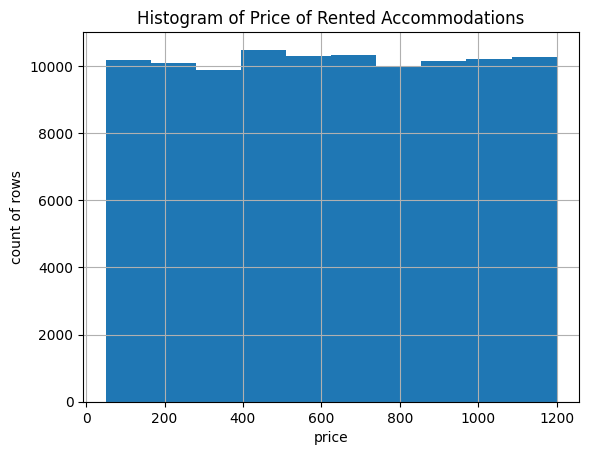

In [ ]:
numerical_df = data.copy()
fig, ax = plt.subplots(1,1)
numerical_df.hist(column='price', ax=ax)
ax.set_title("Histogram of Price of Rented Accommodations")
ax.set(xlabel='price', ylabel='count of rows')

### Histogram of service fee

[Text(0.5, 0, 'Service Fee'), Text(0, 0.5, 'count of rows')]

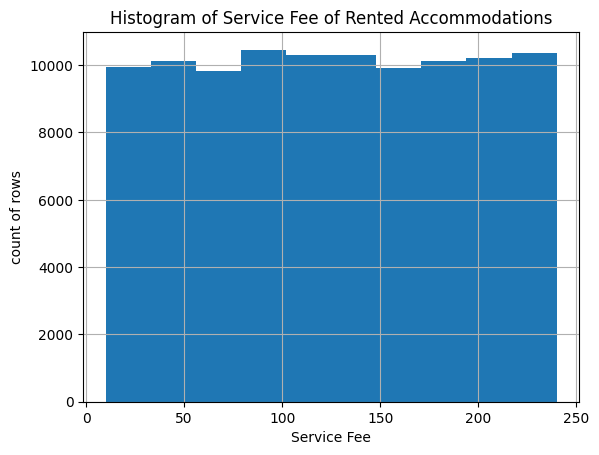

In [ ]:
numerical_df = data.copy()
fig, ax = plt.subplots(1,1)
numerical_df.hist(column='service fee', ax=ax)
ax.set_title("Histogram of Service Fee of Rented Accommodations")
ax.set(xlabel='Service Fee', ylabel='count of rows')

### Correlation plot of Numerical Measures

<Axes: >

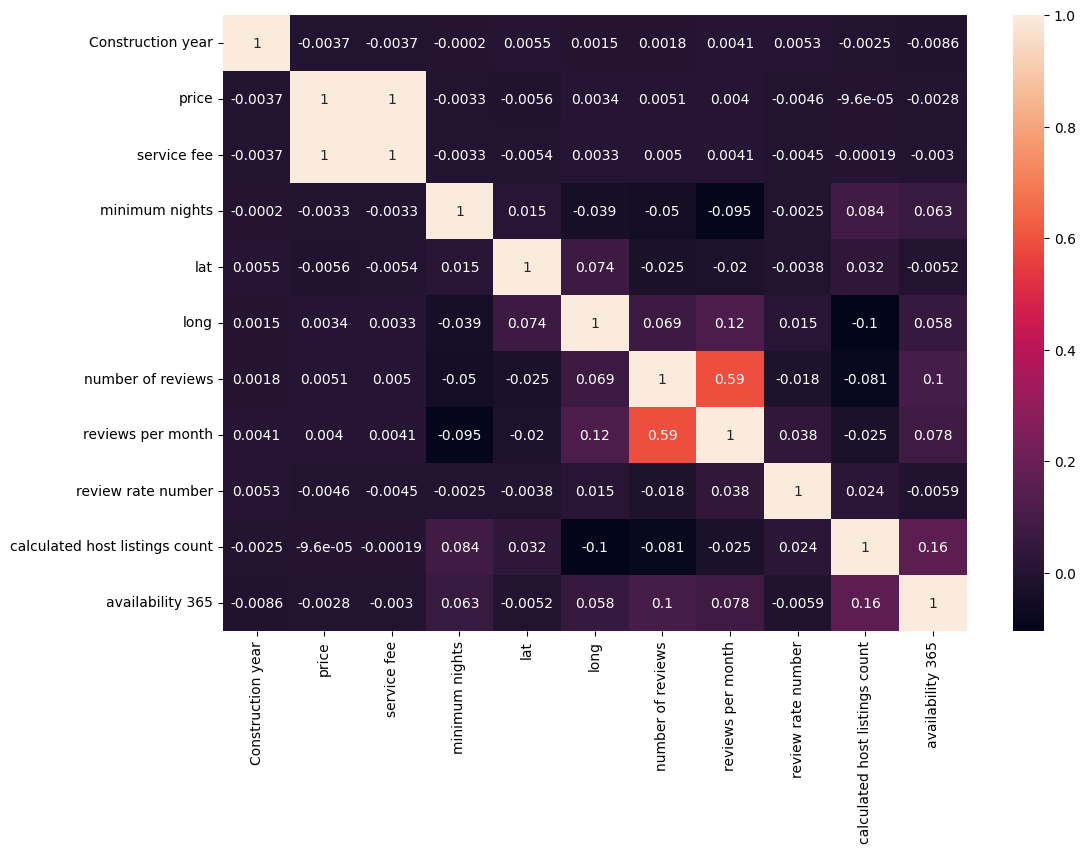

In [ ]:
numerical_measures = ['Construction year', 'price', 'service fee', 'minimum nights', 'lat', 'long', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']
corr = data.loc[:, numerical_measures].corr()
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(corr, annot=True, ax=ax)

## Plot between Price and Service fee

Text(0.5, 1.0, 'Plot between Price and Service Fee')

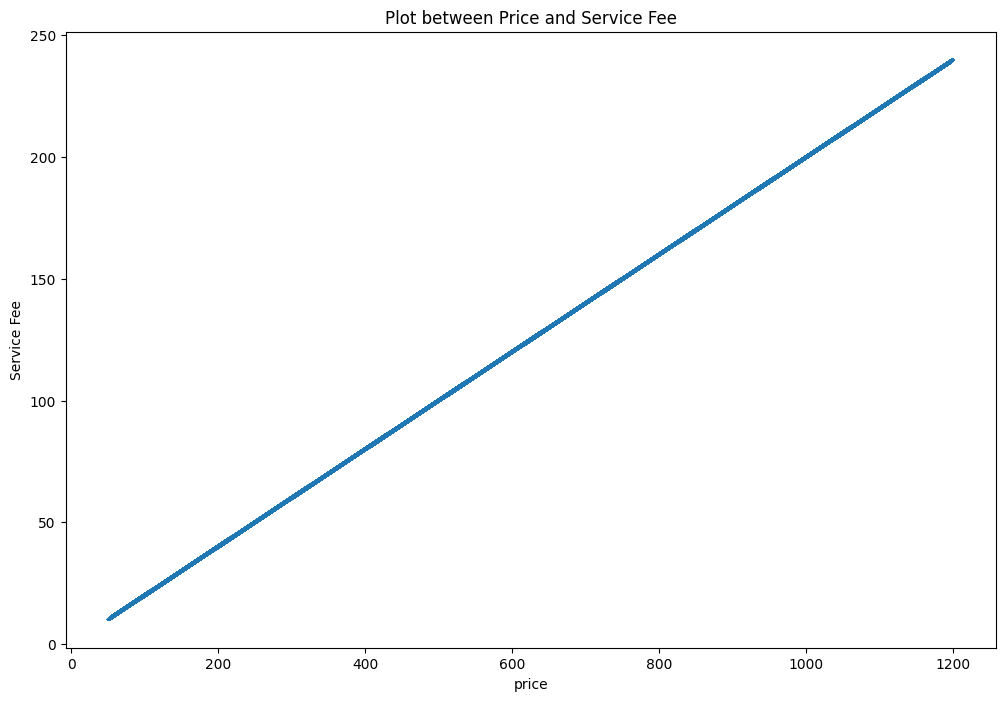

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(data.price, data['service fee'])
ax.set(xlabel='price', ylabel='Service Fee')
ax.set_title("Plot between Price and Service Fee")

# Descriptive Statistics

- Generating Summary Statistics
- Help Answer Research Questions
- Outliers and Boxplots

## Generating Summary Statistics

- Show summary statistics
- Obtain ranks for each Airbnb Open Data

In [ ]:
# showing summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101811.0,2.919211e+07,1.627009e+07,1.001254e+06,1.511122e+07,2.919183e+07,4.329012e+07,5.736742e+07
host id,101811.0,4.925743e+10,2.853645e+10,1.236005e+08,2.458836e+10,4.912062e+10,7.398764e+10,9.876313e+10
lat,101803.0,4.072809e+01,5.586603e-02,4.049979e+01,4.068872e+01,4.072228e+01,4.076277e+01,4.091697e+01
long,101803.0,-7.394966e+01,4.950258e-02,-7.424984e+01,-7.398257e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,101601.0,2.012488e+03,5.765345e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
price,101811.0,6.253556e+02,3.316726e+02,5.000000e+01,3.400000e+02,6.250000e+02,9.130000e+02,1.200000e+03
service fee,101572.0,1.250508e+02,6.633372e+01,1.000000e+01,6.800000e+01,1.250000e+02,1.830000e+02,2.400000e+02
minimum nights,101411.0,8.116338e+00,3.061968e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,101628.0,2.752219e+01,4.958433e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.100000e+01,1.024000e+03
reviews per month,86020.0,1.376463e+00,1.749085e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.010000e+00,9.000000e+01


In [ ]:
# showing rank information of the dataset
data.rank()

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1.0,82574.0,25558.5,23456.0,58710.0,6024.5,33948.0,50906.0,50906.0,25533.5,...,80782.0,83698.5,54704.5,34450.0,20771.5,66725.5,90078.5,78801.0,10553.5,NaN
1,2.0,54192.0,76464.0,65948.0,65785.0,70022.5,24061.0,50906.0,50906.0,25533.5,...,7916.5,93977.5,82493.5,57370.0,30774.5,66725.5,70154.5,70523.5,31018.5,NaN
2,3.0,81342.0,25558.5,65948.0,49955.0,92705.0,68274.0,50906.0,50906.0,76389.0,...,50415.5,56698.5,7824.0,NaN,NaN,89897.5,31489.5,91650.0,14839.5,NaN
3,4.0,87814.0,25558.5,23456.0,22351.0,21869.0,44119.0,50906.0,50906.0,76389.0,...,27961.5,93977.5,101022.0,23824.5,81978.0,66725.5,31489.5,84566.0,NaN,NaN
4,5.0,94895.0,76464.0,65948.0,31131.0,89036.0,65431.5,50906.0,50906.0,25533.5,...,13624.0,83698.5,54704.5,37769.5,10866.5,43610.5,31489.5,79215.5,34627.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,101807.0,79701.0,25558.5,23456.0,39234.0,6388.0,42633.5,50906.0,50906.0,76389.0,...,NaN,80834.5,59984.5,51600.0,33466.0,89897.5,31489.5,12123.0,40764.5,NaN
102054,101808.0,47734.0,76464.0,23456.0,14976.5,32869.5,79612.0,50906.0,50906.0,25533.5,...,NaN,12634.0,68071.5,83644.0,42425.0,43610.5,70154.5,12123.0,1385.5,NaN
102055,101809.0,24665.0,76464.0,23456.0,6843.5,16370.5,89556.0,50906.0,50906.0,76389.0,...,NaN,36975.5,84069.5,74376.0,74801.0,66725.5,70154.5,71364.5,2824.5,NaN
102056,101810.0,16183.0,25558.5,65948.0,49955.0,93545.5,66518.5,50906.0,50906.0,76389.0,...,NaN,36975.5,7824.0,NaN,NaN,4578.0,31489.5,12123.0,11018.5,NaN


## Quality of Measurements

- Construction year is not a good attribute in quality of measurements because Nov-2012 is almost equal to Jan-2013. In that case analysis could be distorted.

- Relation between Price and Service Fee is unknown to us but there is some strict correlation

- Some latitudes and longitudes are only 3 decimal places precise, as opposed to 5 decimal places precision for other values

### Plot between Construction Year and Net Price

**Group by Construction Year and taking sum of Price**

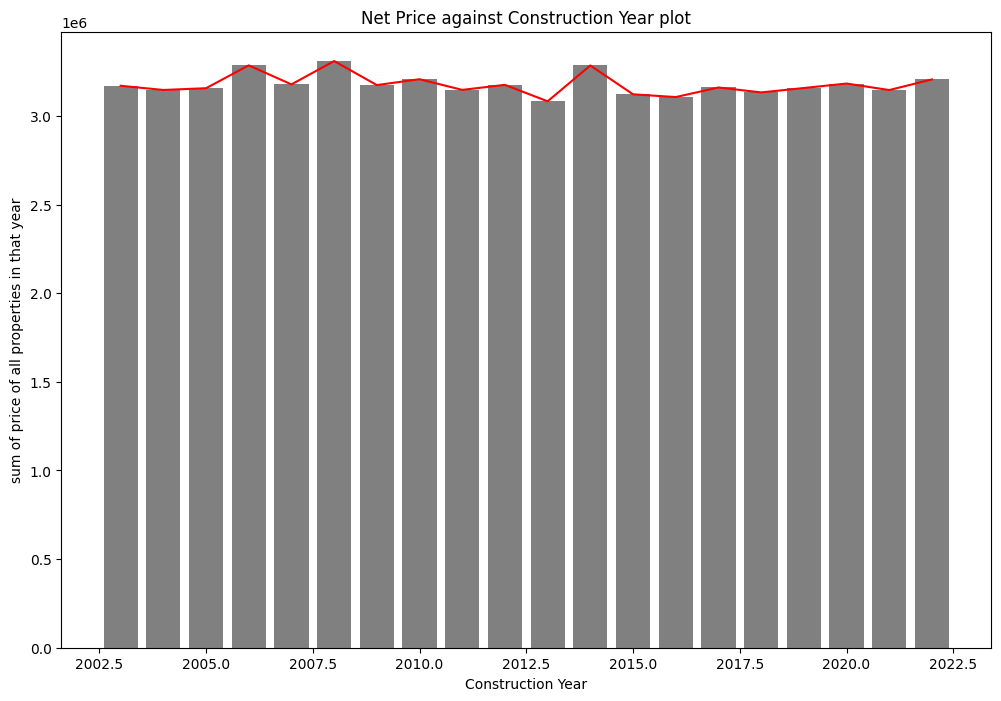

In [ ]:
g = data.groupby(by='Construction year')['price'].agg(['sum', 'mean'])
fig, ax = plt.subplots(1,1,figsize=(12,8))

ax.bar(g.index, g['sum'], color='gray')
ax.set(xlabel='Construction Year', ylabel='sum of price of all properties in that year')
ax.set_title("Net Price against Construction Year plot")

ax.plot(g.index, g['sum'], color='red')

**Confidence bands between Construction Year and Price**

Text(0.5, 1.0, 'Plot between Construction Year and Mean Price')

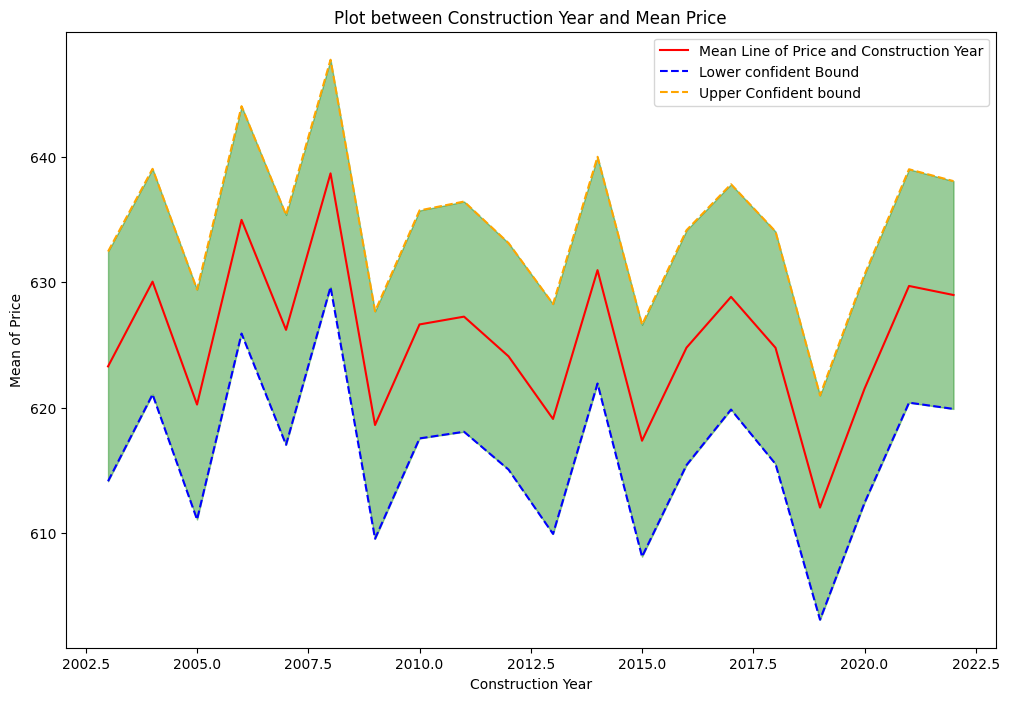

In [ ]:
g = data.groupby(by='Construction year')['price'].agg(['sum', 'mean', 'sem'])
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(g.index, g['mean'], color='red', label='Mean Line of Price and Construction Year')
ax.plot(g.index, g['mean']-1.96*g['sem'], color='blue', label='Lower confident Bound', ls='dashed')
ax.plot(g.index, g['mean']+1.96*g['sem'], color='orange', label='Upper Confident bound', ls='dashed')
ax.fill_between(g.index, y1=g['mean']-1.96*g['sem'], y2=g['mean']+1.96*g['sem'], edgecolor='g', facecolor='g', alpha=0.4)
ax.legend()
ax.set(xlabel='Construction Year', ylabel='Mean of Price')
ax.set_title("Plot between Construction Year and Mean Price")

## Box plot of numerical measures

- **To check the outliers**
- **To understand the confidence bands**

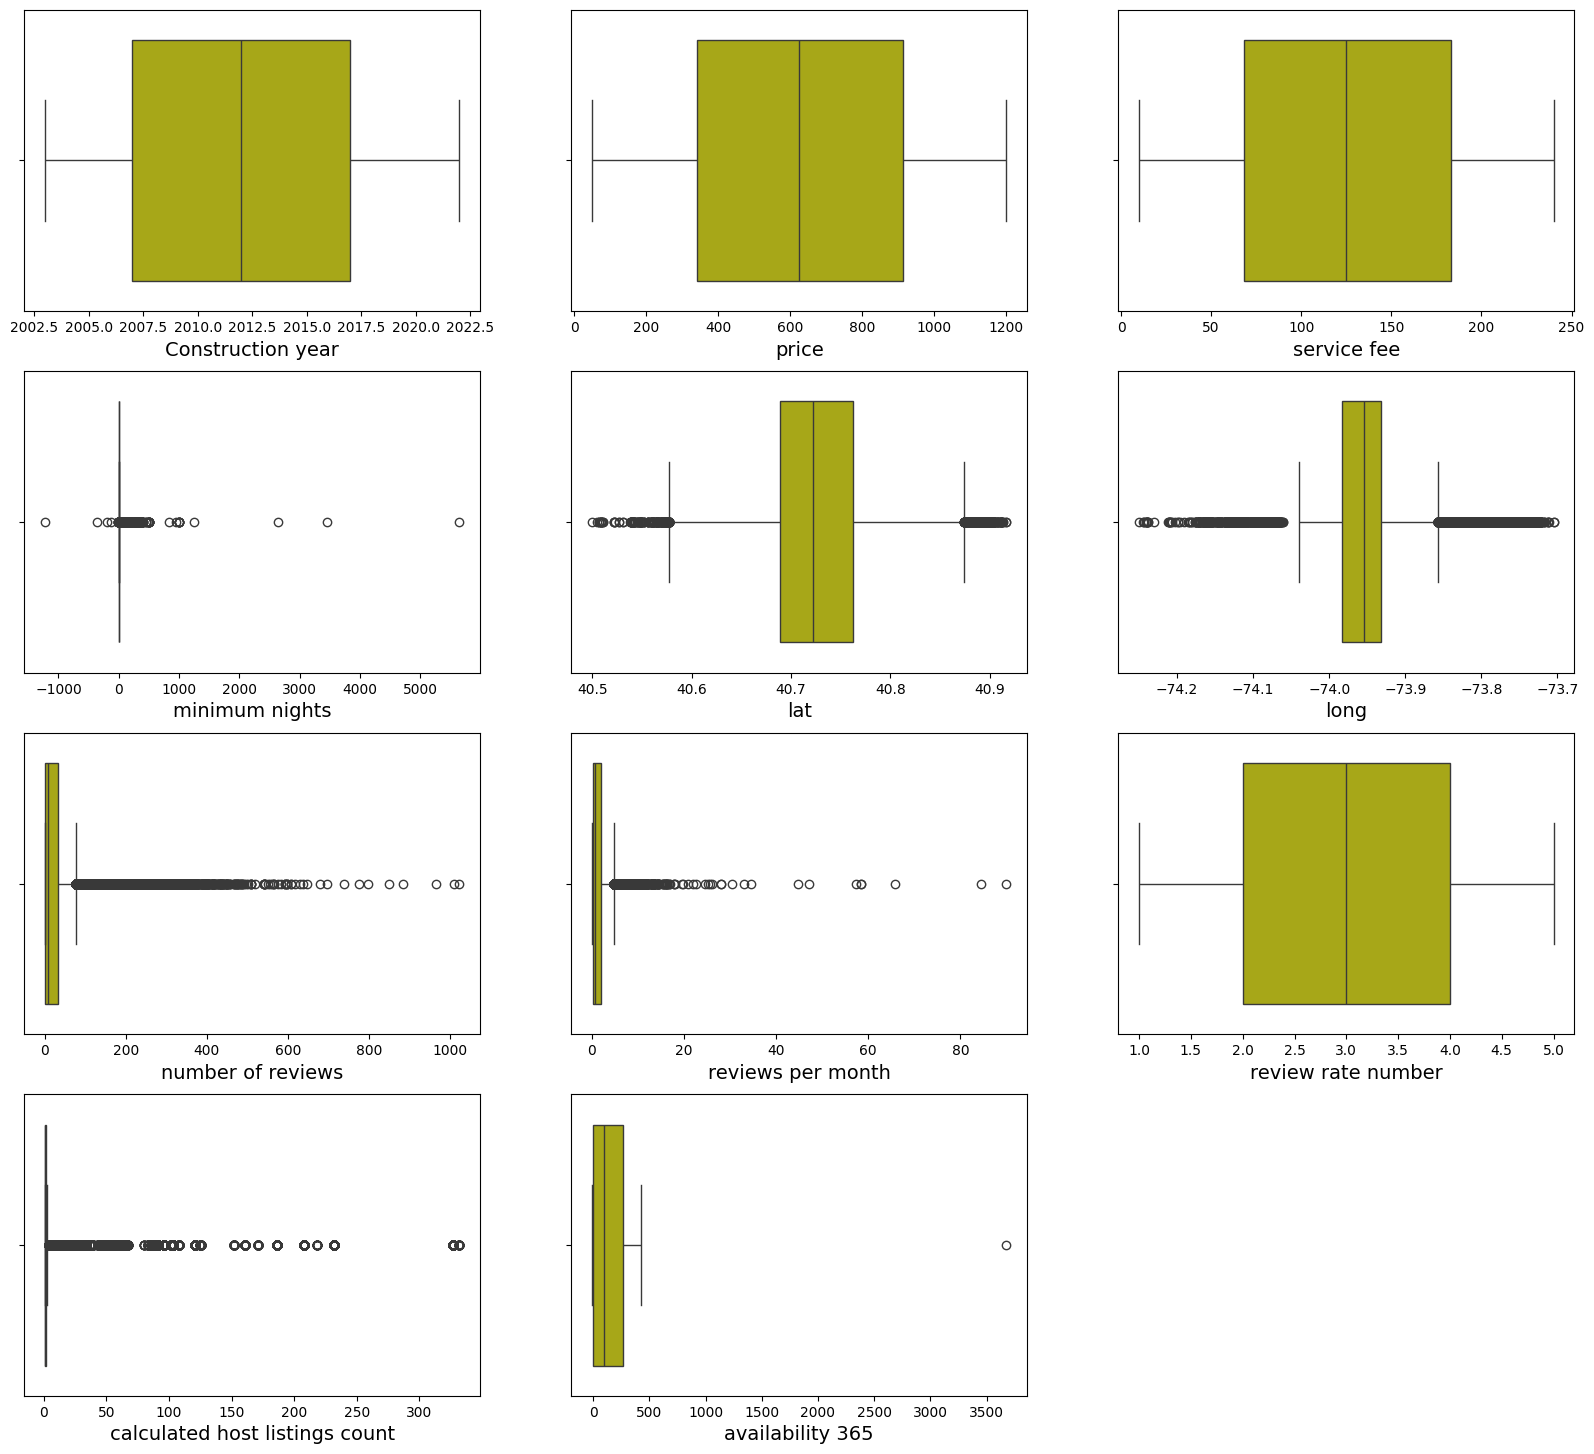

In [ ]:
# set a = 1 to increment
a=1
# set figure size
plt.figure(figsize=(20,18))
# iterate through numerical measures
for attr in numerical_measures:
    # create subplots
    plt.subplot(4,3,a)
    # plot boxplot
    ax=sns.boxplot(x=attr, data=data, color='y')
    # set label
    plt.xlabel(attr, fontsize=14)
    # increment a
    a+=1
# show plot
plt.show()

Findings:

- **There are outliers for latitude and longitude attributes (geographical attributes)**
- **There are outliers for reviews attributes but not pricing attributes as pricing attributes are evenly separated**
- **There are no outliers for review rate number**

## Scatter matrix for numerical measures

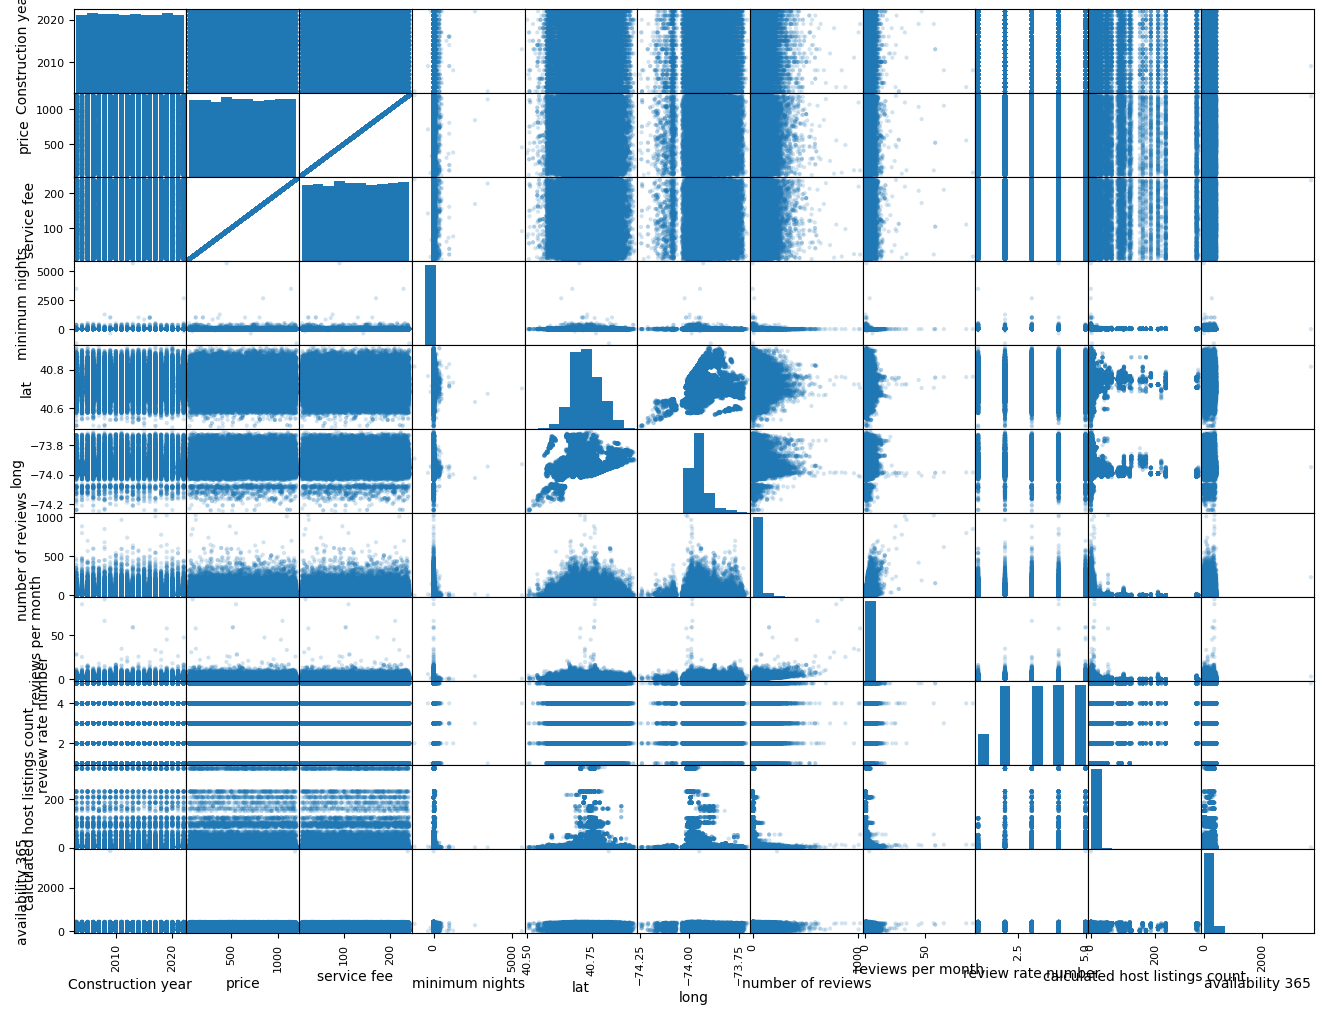

In [ ]:
# plot a scatter matrix using pandas plotting
pd.plotting.scatter_matrix(data.loc[:, numerical_measures], alpha=0.2, figsize=(16,12))
# show the plot
plt.show()

- **Correlation plot gives values**
- **Whereas, scatter matrix plot gives out plotting figures in the relationship between the two variables**

# 1.0 Research Questions

# 1.1 Research Question 1

## 1.1 What is the Geographical Distribution of AirBnb rented properties over Price?

In [12]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
crs = {'init':'epsg:4326'}
street_map = gpd.read_file('https://github.com/aswinvk28/collection-of-kaggle-datasets/raw/refs/heads/main/datasets/real_estate/airbnb_open_data/cb_2018_36_bg_500k.shp')
geo_df = gpd.GeoDataFrame(data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,geometry
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,POINT (-73.97237 40.64749)
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,POINT (-73.98377 40.75362)
2,1002403,78829239556,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,...,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,POINT (-73.9419 40.80902)
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN,POINT (-73.95976 40.68514)
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,POINT (-73.94399 40.79851)


## Plotting the U.S. state of New York

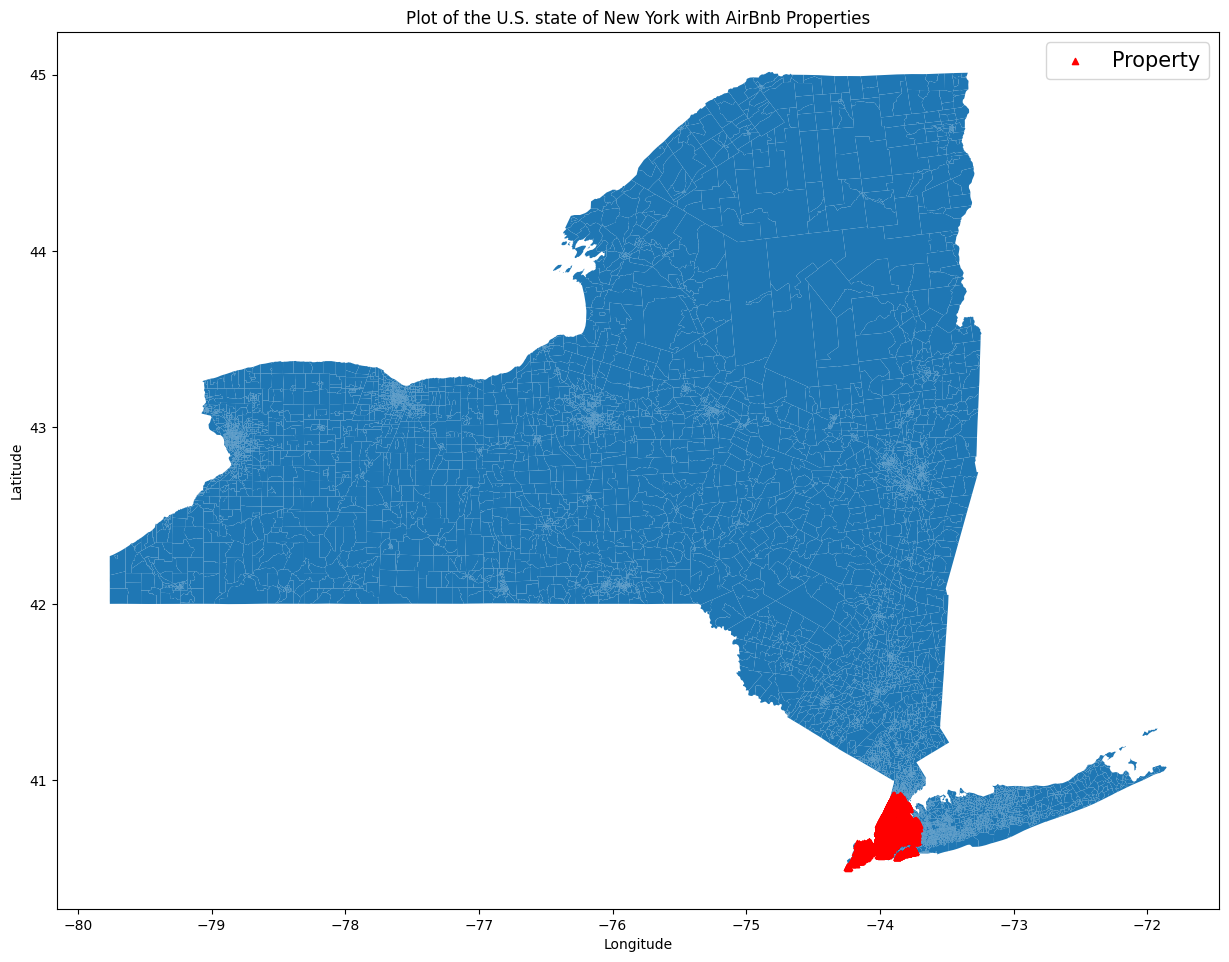

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
geo_df.plot(ax=ax,
            markersize=20,
            color='red',
            marker='^',
            label='Property')
plt.legend(prop={'size':15})
ax.set(xlabel='Longitude', ylabel='Latitude')
ax.set_title("Plot of the U.S. state of New York with AirBnb Properties")
plt.show()

## Plotting the Price as color palette within the U.S. state of New York

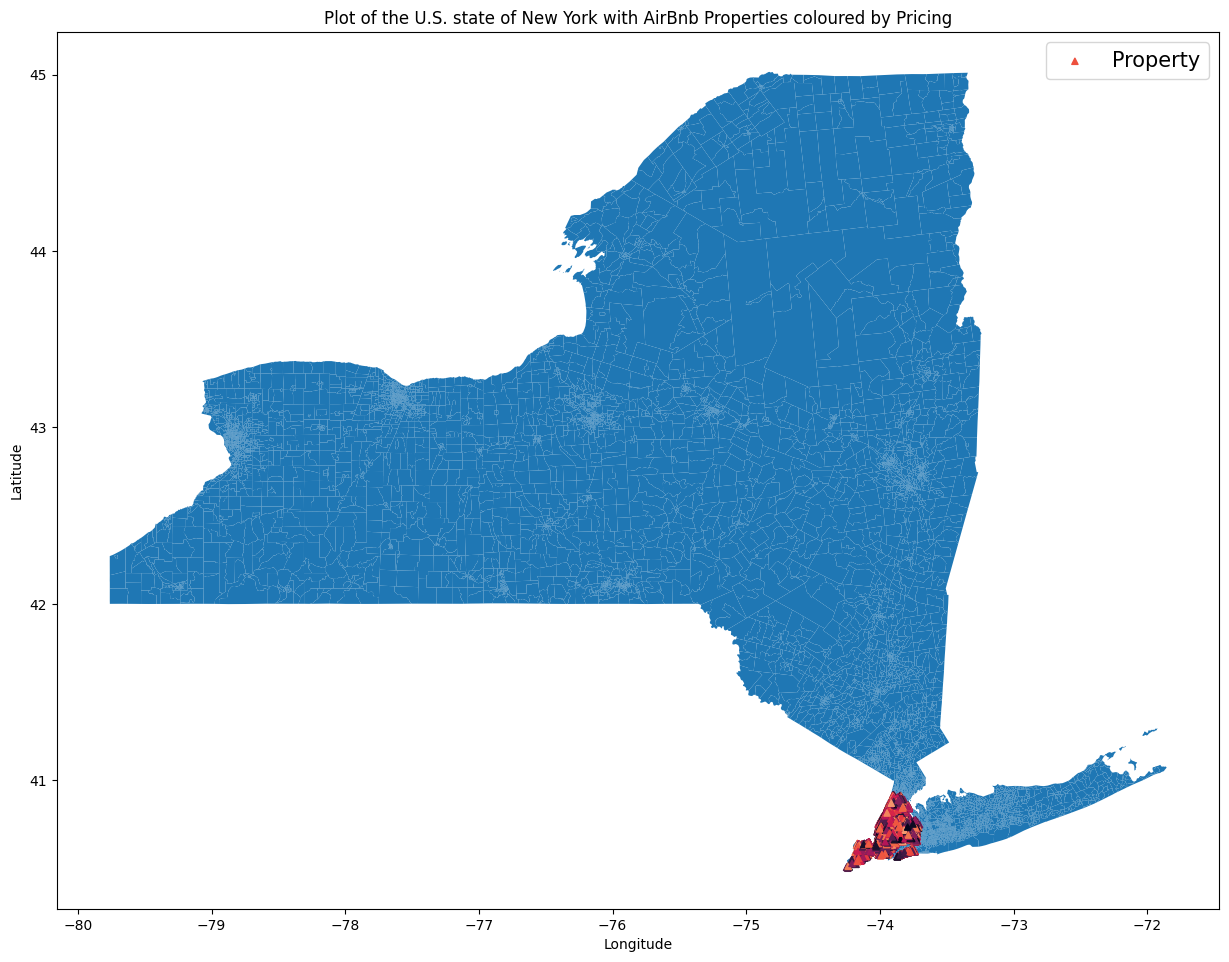

In [15]:
colors = sns.color_palette("rocket", as_cmap=True).colors
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
color_array = []
idx = 0
r = data['price'].rank()
for lat in data['lat']:
  color_array.append(colors[(r.iloc[idx] // 500).astype(np.int32)])
  idx += 1
geo_df.plot(ax=ax,
            markersize=20,
            color=color_array,
            marker='^',
            label='Property')
plt.legend(prop={'size':15})
ax.set(xlabel='Longitude', ylabel='Latitude')
ax.set_title("Plot of the U.S. state of New York with AirBnb Properties coloured by Pricing")
plt.show()

- **The Geographical Distribution denotes darker colors as low Priced as brighter colors of Red as High Priced Properties**
- **High Priced Properties are usually found near the Sea Coast**

**This confirms our plot is Correct**

# 2.1 Research Question 2

## 2.1 What is the relation between Price, Room Type and Neighbourhood Group?

<ipython-input-29-7ada8a1d2186>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_df = data.loc[:, ['price', 'room type', 'neighbourhood group']].groupby(['room type', 'neighbourhood group']).mean()


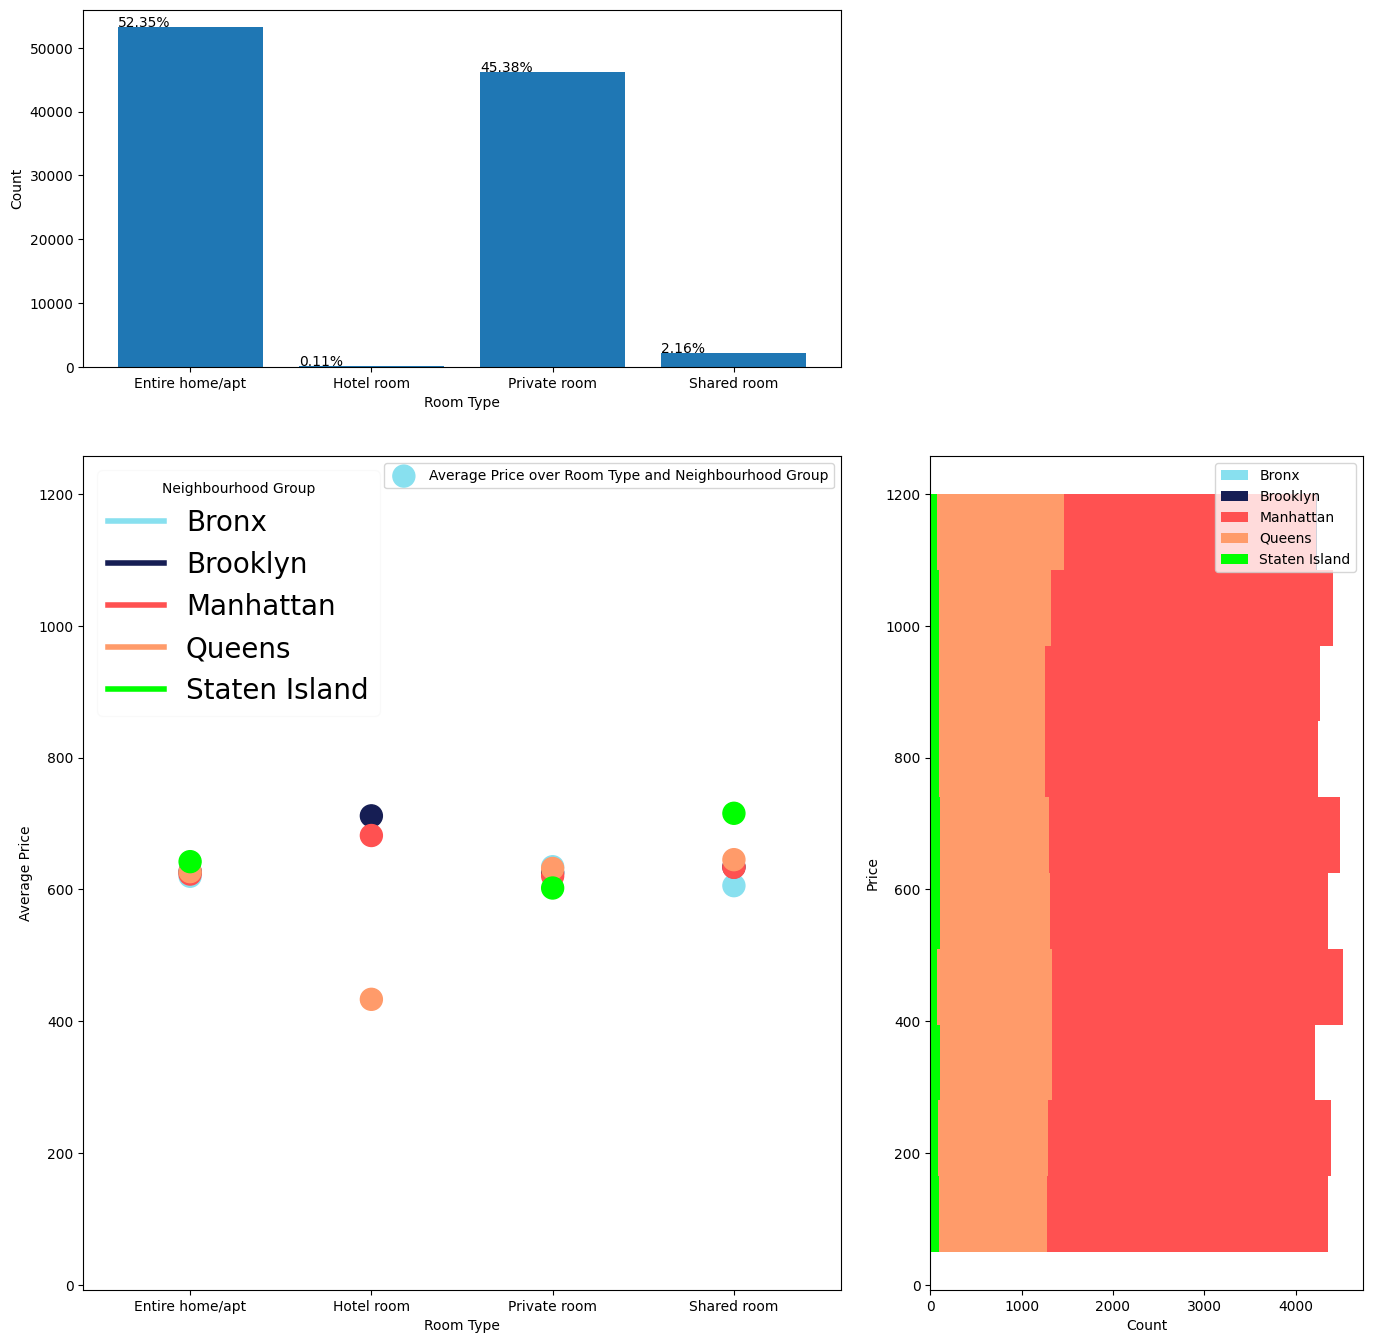

In [29]:
# setup the gridspec 2,2 with one main plot and 2 side plots on x and y axes respectively
result = setup_gridspec__one_main__two_side_subplots(plt)
# gridspec
gs = result["gridspec"]
# axis
ax = result["ax"]
# axis on top parallel to x-axis
axx = result["axx"]
# axis on the side parallel to y-axis
axy = result["axy"]
# figure of the plot
fig = result["fig"]

def plot_price_room_type_reviews_per_month_by_neighbourhood_group():

  average_price_df = data.loc[:, ['price', 'room type', 'neighbourhood group']].groupby(['room type', 'neighbourhood group']).mean()

  room_type = average_price_df.index.get_level_values(0)
  neighbourhood_group = average_price_df.index.get_level_values(1)

  unique_colors = ['#88E0EF', '#161E54', '#FF5151', '#FF9B6A', '#00ff00']

  colors = dict(zip(np.unique(neighbourhood_group), unique_colors))

  ax.scatter(room_type, average_price_df['price'], c=[colors[ng] for ng in neighbourhood_group], marker='o', s=250, label='Average Price over Room Type and Neighbourhood Group')

  # create custom legend, by creating custom lines
  custom_lines = [Line2D([0], [0], color=colors[ng], lw=4) for ng in np.unique(neighbourhood_group)]
  # create legend using custom lines
  legend1 = ax.legend(custom_lines, np.unique(neighbourhood_group), loc="upper left", title="Neighbourhood Group", framealpha=0.1, fontsize=20)
  # add legend to axis
  ax.add_artist(legend1)
  ax.legend()

  ax.set(xlabel='Room Type', ylabel='Average Price')

  room_type_df = data.loc[:, ['room type']].value_counts().reset_index()
  bar_plot = axx.bar(room_type_df['room type'], room_type_df['count'])
  idx = 0
  for i in bar_plot.patches:
    axx.text(i.get_x(), i.get_height() + 5.0, str(round(room_type_df.iloc[idx, 1]/room_type_df['count'].sum()*100, 2))+str('%'))
    idx += 1

  axx.set(xlabel='Room Type', ylabel='Count')

  axy.hist(data.loc[data['neighbourhood group'] == 'Bronx', ['price']], orientation='horizontal', label='Bronx', color=unique_colors[0])
  axy.hist(data.loc[data['neighbourhood group'] == 'Brooklyn', ['price']], orientation='horizontal', label='Brooklyn', color=unique_colors[1])
  axy.hist(data.loc[data['neighbourhood group'] == 'Manhattan', ['price']], orientation='horizontal', label='Manhattan', color=unique_colors[2])
  axy.hist(data.loc[data['neighbourhood group'] == 'Queens', ['price']], orientation='horizontal', label='Queens', color=unique_colors[3])
  axy.hist(data.loc[data['neighbourhood group'] == 'Staten Island', ['price']], orientation='horizontal', label='Staten Island', color=unique_colors[4])

  axy.set(xlabel='Count', ylabel='Price')

  axy.legend()

plot_price_room_type_reviews_per_month_by_neighbourhood_group()

Findings:

- If an entire home /apt is allocated, Staten island contains on an average highly priced rented accommodation.
- If a hotel room is allocated as a rented accommodation, Brooklyn followed by Manhattan are highly priced accommodations on an average
- For Private Room, it is Bronx on the highest average but Staten Island on the lower side on an average
- For shared room, Staten Island is generally expensive and Bronx is comparatively cheaper on an average

# 3.1 Research Question 3

## 3.1 What type of Rooms for Brooklyn Properties have a high Price and high Review Rate Number?

<ipython-input-34-bbcba0ab965e>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brooklyn_df = data.loc[data['neighbourhood group'] == 'Brooklyn', ['room type', 'price', 'review rate number']].groupby(['room type']).mean()


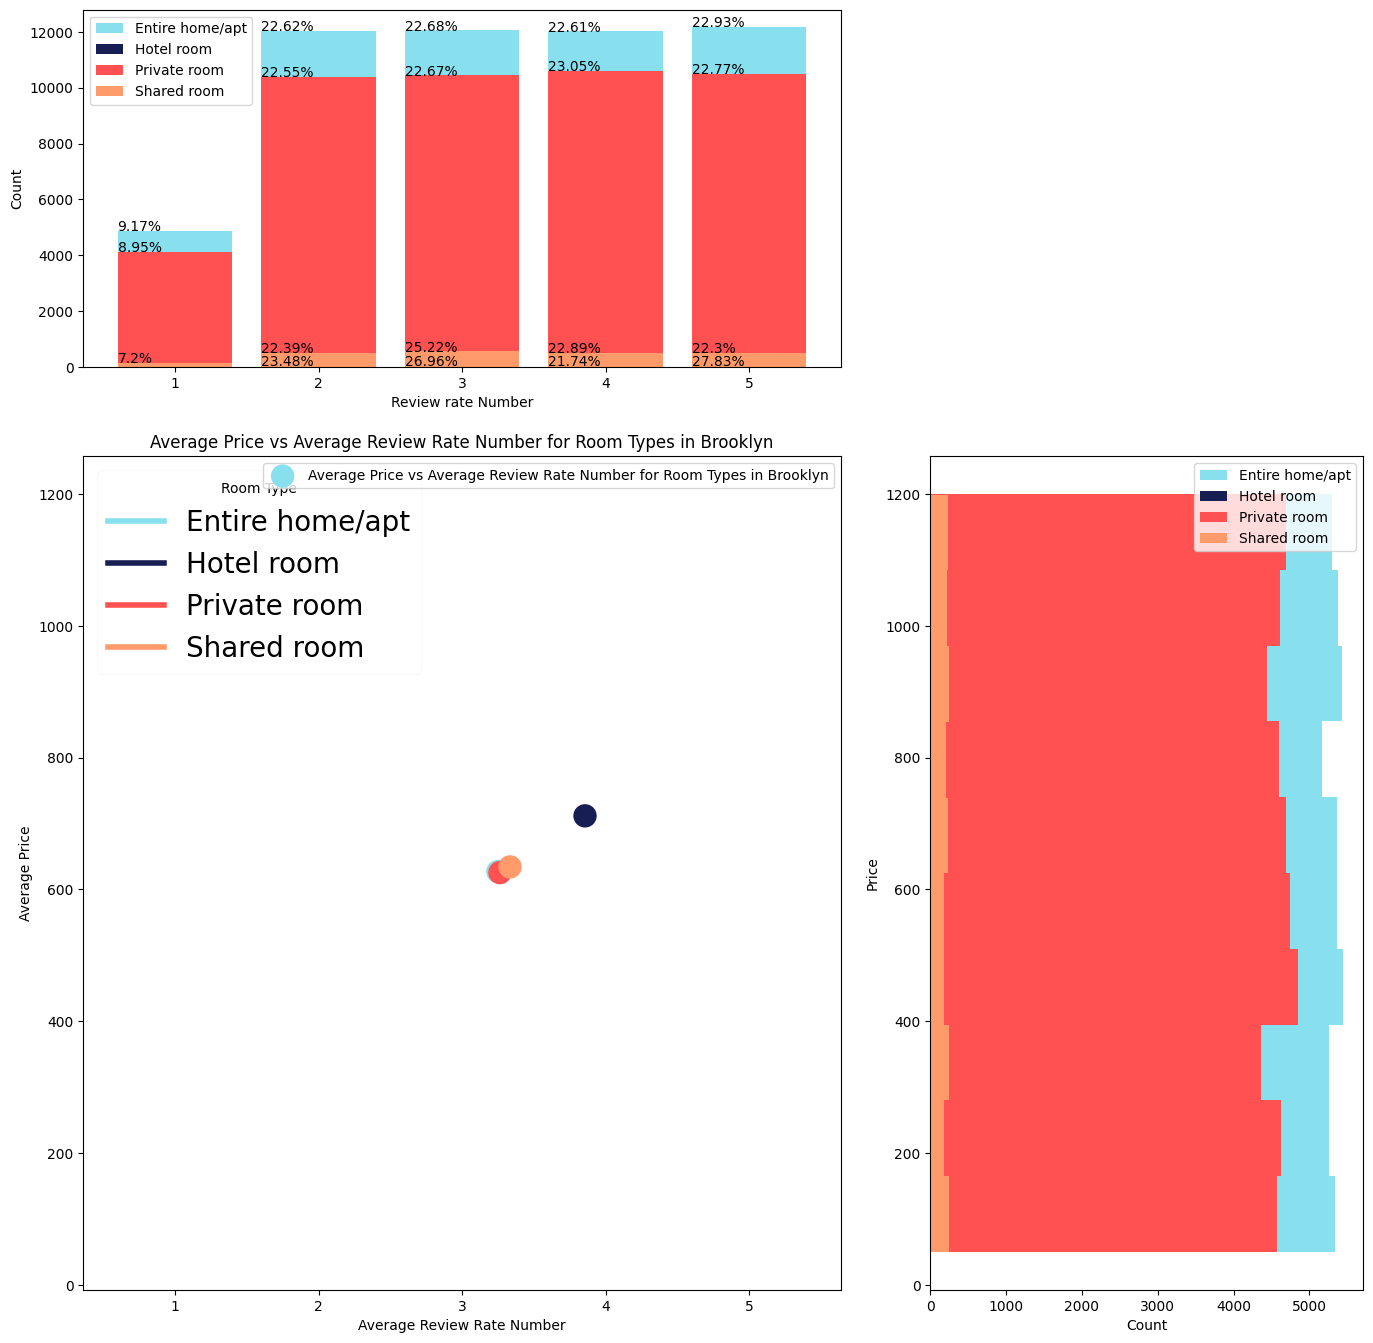

In [34]:
# setup the gridspec 2,2 with one main plot and 2 side plots on x and y axes respectively
result = setup_gridspec__one_main__two_side_subplots(plt)
# gridspec
gs = result["gridspec"]
# axis
ax = result["ax"]
# axis on top parallel to x-axis
axx = result["axx"]
# axis on the side parallel to y-axis
axy = result["axy"]
# figure of the plot
fig = result["fig"]

def plot_room_type_price_review_rate_number():

  brooklyn_df = data.loc[data['neighbourhood group'] == 'Brooklyn', ['room type', 'price', 'review rate number']].groupby(['room type']).mean()
  room_type = brooklyn_df.index.get_level_values(0)

  unique_colors = ['#88E0EF', '#161E54', '#FF5151', '#FF9B6A']

  colors = dict(zip(np.unique(room_type), unique_colors))

  ax.scatter(brooklyn_df['review rate number'], brooklyn_df['price'], s=250, c=[colors[rt] for rt in room_type], label='Average Price vs Average Review Rate Number for Room Types in Brooklyn')
  ax.set(xlabel='Average Review Rate Number', ylabel='Average Price')
  ax.set_title("Average Price vs Average Review Rate Number for Room Types in Brooklyn")

  # create custom legend, by creating custom lines
  custom_lines = [Line2D([0], [0], color=colors[rt], lw=4) for rt in np.unique(room_type)]
  # create legend using custom lines
  legend1 = ax.legend(custom_lines, np.unique(room_type), loc="upper left", title="Room Type", framealpha=0.1, fontsize=20)
  # add legend to axis
  ax.add_artist(legend1)
  ax.legend()

  room_type_df = data.loc[data['room type'] == 'Entire home/apt', ['review rate number']].value_counts().reset_index()
  bar_plot1 = axx.bar(room_type_df['review rate number'], room_type_df['count'], color=unique_colors[0], label='Entire home/apt')
  idx = 0
  for i in bar_plot1.patches:
    axx.text(i.get_x(), i.get_height() + 5.0, str(round(room_type_df.iloc[idx, 1]/room_type_df['count'].sum()*100, 2))+str('%'))
    idx += 1

  room_type_df = data.loc[data['room type'] == 'Hotel room', ['review rate number']].value_counts().reset_index()
  bar_plot2 = axx.bar(room_type_df['review rate number'], room_type_df['count'], color=unique_colors[1], label='Hotel room')
  idx = 0
  for i in bar_plot2.patches:
    axx.text(i.get_x(), i.get_height() + 5.0, str(round(room_type_df.iloc[idx, 1]/room_type_df['count'].sum()*100, 2))+str('%'))
    idx += 1

  room_type_df = data.loc[data['room type'] == 'Private room', ['review rate number']].value_counts().reset_index()
  bar_plot3 = axx.bar(room_type_df['review rate number'], room_type_df['count'], color=unique_colors[2], label='Private room')
  idx = 0
  for i in bar_plot3.patches:
    axx.text(i.get_x(), i.get_height() + 5.0, str(round(room_type_df.iloc[idx, 1]/room_type_df['count'].sum()*100, 2))+str('%'))
    idx += 1

  room_type_df = data.loc[data['room type'] == 'Shared room', ['review rate number']].value_counts().reset_index()
  bar_plot4 = axx.bar(room_type_df['review rate number'], room_type_df['count'], color=unique_colors[3], label='Shared room')
  idx = 0
  for i in bar_plot4.patches:
    axx.text(i.get_x(), i.get_height() + 5.0, str(round(room_type_df.iloc[idx, 1]/room_type_df['count'].sum()*100, 2))+str('%'))
    idx += 1

  axx.set(xlabel='Review rate Number', ylabel='Count')
  axx.legend()

  axy.hist(data.loc[data['room type'] == 'Entire home/apt', ['price']], orientation='horizontal', color=unique_colors[0], label='Entire home/apt')
  axy.hist(data.loc[data['room type'] == 'Hotel room', ['price']], orientation='horizontal', color=unique_colors[1], label='Hotel room')
  axy.hist(data.loc[data['room type'] == 'Private room', ['price']], orientation='horizontal', color=unique_colors[2], label='Private room')
  axy.hist(data.loc[data['room type'] == 'Shared room', ['price']], orientation='horizontal', color=unique_colors[3], label='Shared room')
  axy.legend()
  axy.set(xlabel='Count', ylabel='Price')

plot_room_type_price_review_rate_number()

**Hotel rooms have a high Average Price and high Average Review rate Number**

# 4.1 Research Question 4

## 4.1 At what construction year are highly priced rented properties available for rent?

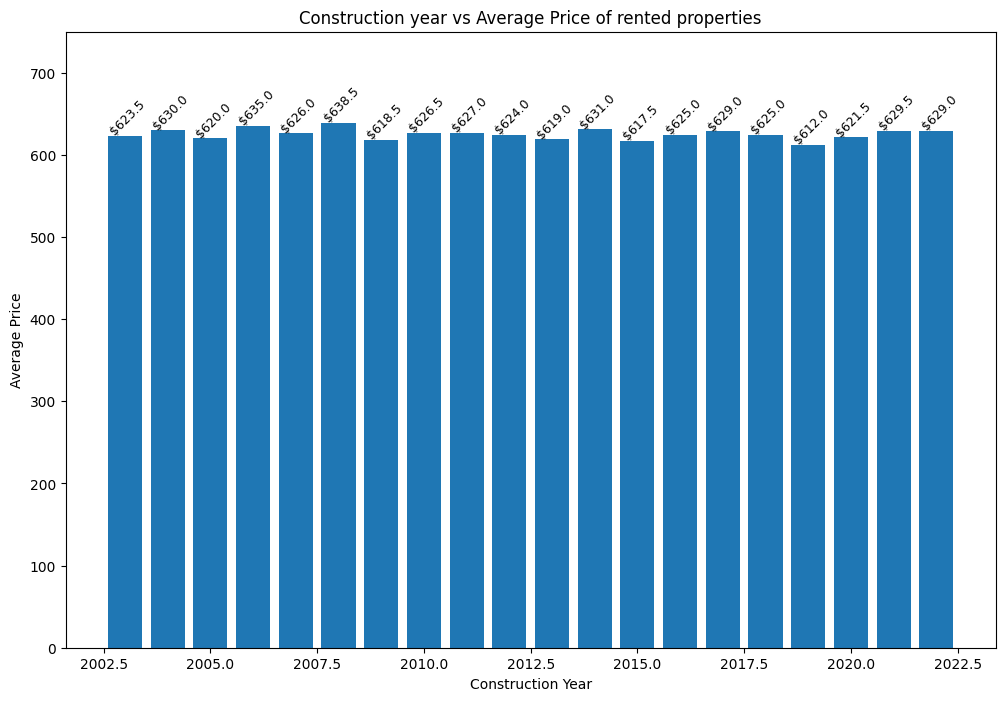

In [ ]:
year_df = data.loc[:, ['price', 'Construction year']].groupby(['Construction year']).mean()

fig, ax = plt.subplots(1,1,figsize=(12,8))
plot_bars = ax.bar(year_df.index, year_df['price'], label='Construction year vs Average Price of rented properties')
ax.set(xlabel='Construction Year', ylabel='Average Price')
ax.set_title("Construction year vs Average Price of rented properties")
ax.set_ylim((0, 750))

# display percentage as text for bars representing low impact.
for i in plot_bars.patches:
  plt.text(i.get_x(), i.get_height()+2.0, '$'+str(np.float16(i.get_height())), fontsize=9, color='0', rotation=45)

**At year 2008, we have seen highly priced Rented Properties.**

# 5.1 Research Question 5

## 5.1 What is the relation between Construction year, availability for the year and Number of Reviews?

<ipython-input-41-1043f9b3fffb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(year_df.loc[year, 'availability 365'], year_df.loc[year, 'number of reviews'], label=int(year), c=colors1._lut[idx*13], s=(year-2000)/(2022-2002)*year*0.75)


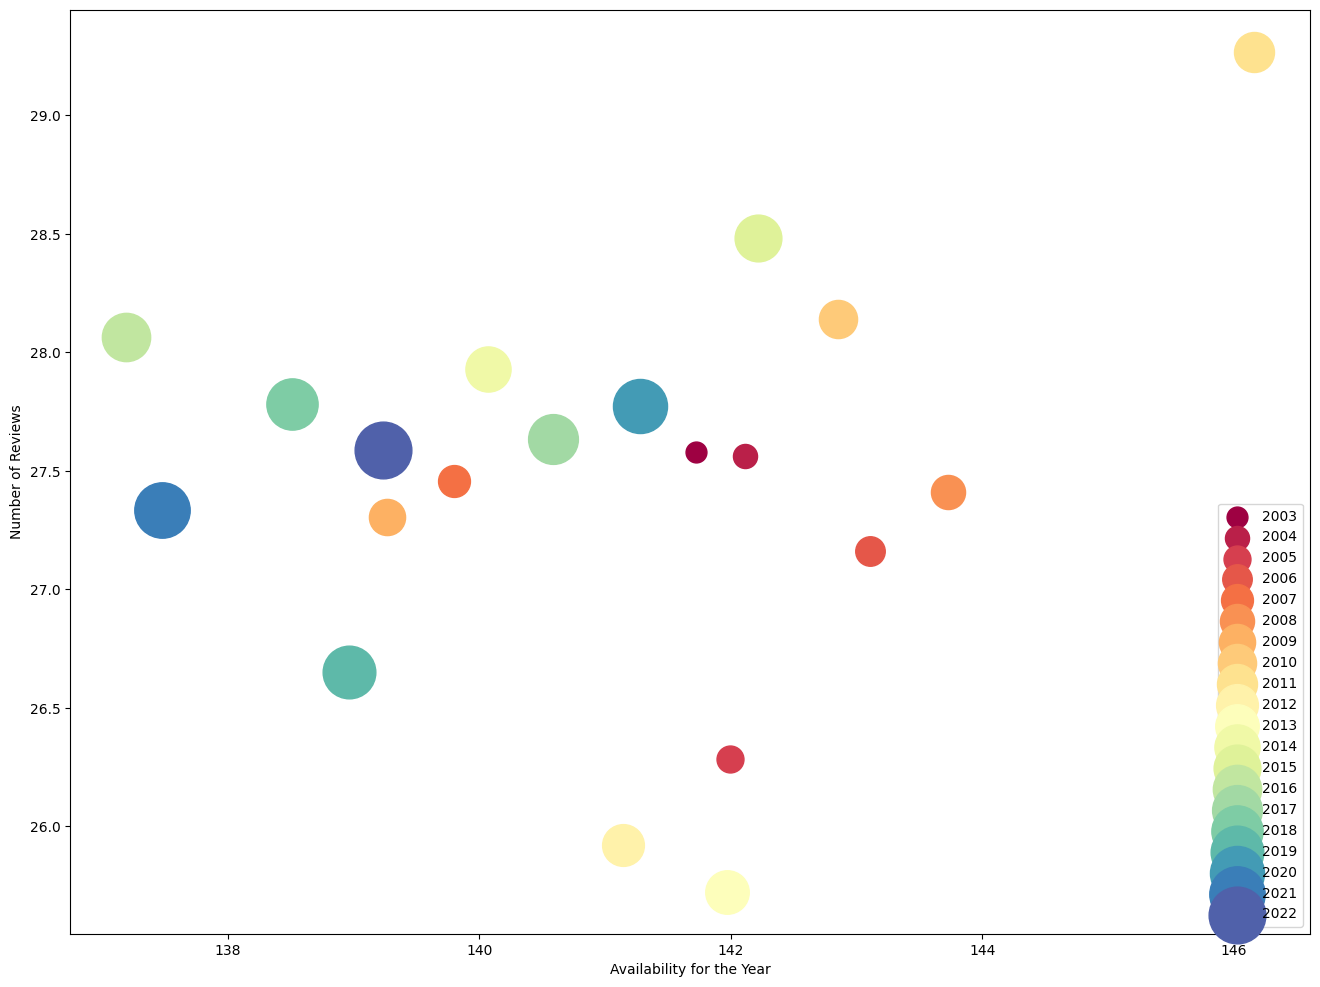

In [41]:
fig, ax = plt.subplots(1,1, figsize=(16,12))

def plot_construction_year_availability_year_number_of_reviews():

  year_df = data.loc[:, ['Construction year', 'availability 365', 'number of reviews']].groupby(['Construction year']).mean()

  colors1 = sns.color_palette('Spectral', as_cmap=True)

  for idx, year in enumerate(year_df.index):
    ax.scatter(year_df.loc[year, 'availability 365'], year_df.loc[year, 'number of reviews'], label=int(year), c=colors1._lut[idx*13], s=(year-2000)/(2022-2002)*year*0.75)
  ax.set_label("Average Availability for the year vs Average Number of Reviews for the Construction Year")
  ax.set(xlabel='Availability for the Year', ylabel='Number of Reviews')
  ax.legend()

plot_construction_year_availability_year_number_of_reviews()

**Findings:**

- **Year 2011, is the year for highest Average Availability for the year and highest average number of reviews**
- **Year 2013, denotes where the Average Number of Reviews is least**
- **Year 2016, denotes where the Average Availability for the Year is the least**

# 6.1 Research Question 6

## 6.1 What is the relation between Cancellation Policy, Room Type and Neighbourhood Group?

In [ ]:
price_df = data.loc[:, ['cancellation_policy', 'room type', 'neighbourhood group', 'price']].groupby(['cancellation_policy', 'room type', 'neighbourhood group']).mean()
cancellation_policy = price_df.index.get_level_values(0)
room_type = price_df.index.get_level_values(1)
neighbourhood_group = price_df.index.get_level_values(2)
price_df['cancellation_policy'] = cancellation_policy
price_df['room type'] = room_type
price_df['neighbourhood group'] = neighbourhood_group

price_df.drop(labels=price_df.loc[pd.isna(price_df['price']) == True].index, inplace=True)

fig = px.treemap(price_df, path=['cancellation_policy', 'room type', 'neighbourhood group'], values='price', color='price', hover_data=['price'], color_continuous_scale='RdBu')

fig.show()

<ipython-input-20-f2889f5d80f0>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=F

**Findings:**

- **Hotel Rooms have varying Prices and have lower pricing in moderate cancellation policy**
- **As observed earlier the Average Prices for Hotel Rooms is generally higher, but here they dominate the Prices**
- **Private Rooms are having almost the same distribution of Prices throughout the Cancellation Policies**
- **Brooklyn for Hotel Room except moderate policy and Staten Island for Shared Room are having generally higher Prices**

# 7.1 Research Question 7

## 7.1 What is the relation between Price/Service fee, minimum nights and number of reviews?

- **Price and Service fee are highly correlated so we can omit one attribute (Service Fee)**

<ipython-input-64-e7da89357a72>:12: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

<ipython-input-64-e7da89357a72>:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



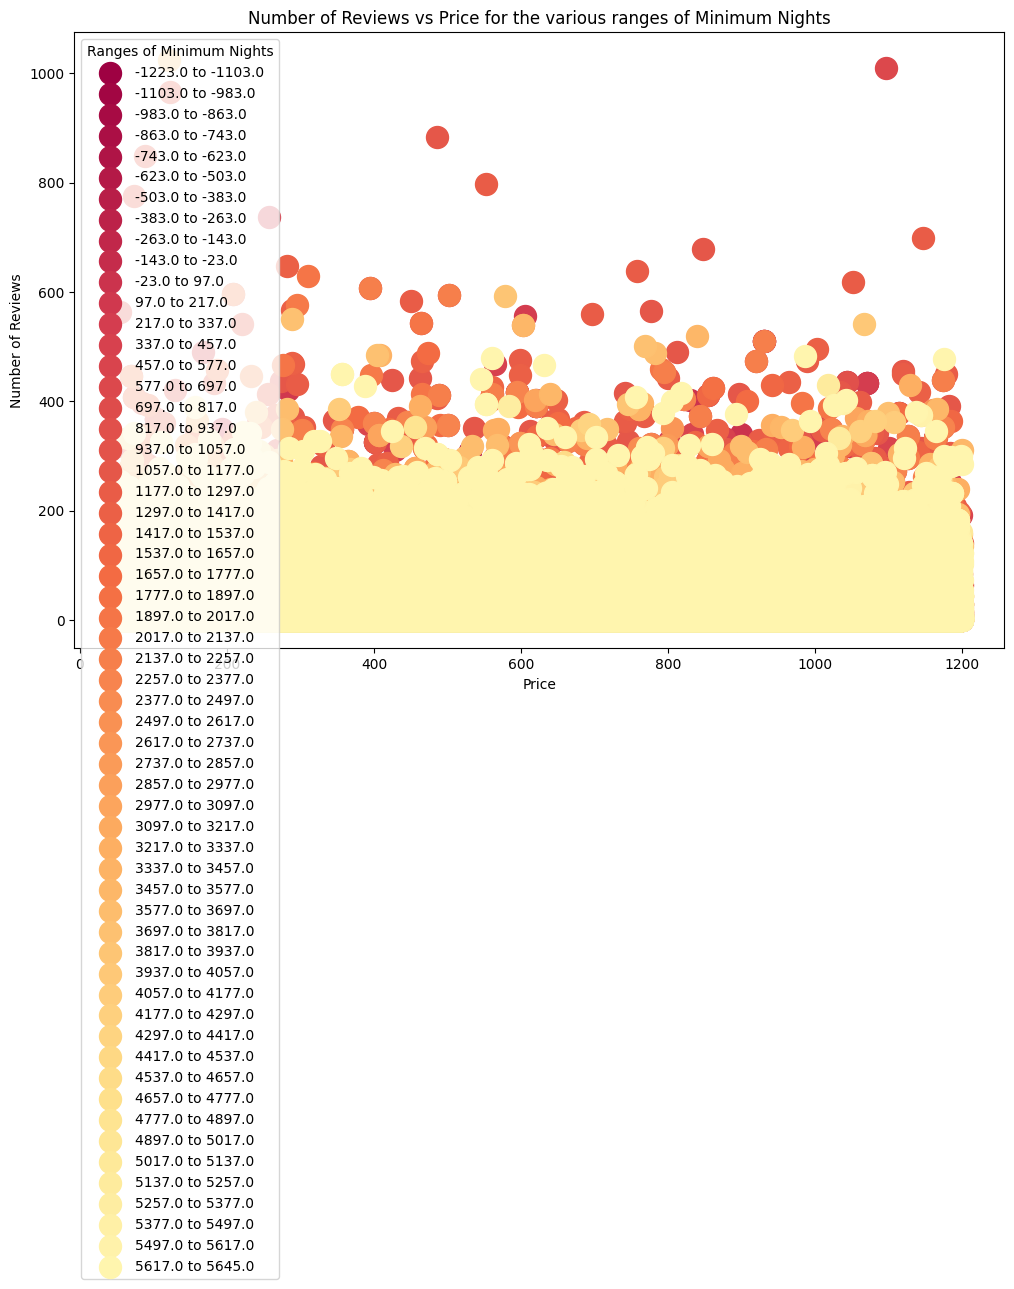

In [ ]:
price_df = data.loc[:, ['number of reviews', 'price', 'minimum nights']].drop(labels=data.loc[pd.isna(data['minimum nights']) == True].index).sort_values(by='minimum nights')

fig, ax = plt.subplots(1,1,figsize=(12,8))

colors = sns.color_palette("Spectral", as_cmap=True)

min_nights_array = np.arange(price_df['minimum nights'].min(), price_df['minimum nights'].max(), 120)
count = price_df.count()['price']

for idx, min_night in enumerate(min_nights_array):
  if (idx < len(min_nights_array) - 1):
    ax.scatter(price_df.iloc[int(idx*count//120):int((idx+1)*count//120), 1], price_df.iloc[int(idx*count//120):int((idx+1)*count//120), 0], c=colors._lut[int(idx*2.1)], s=250, label=str(min_night) + ' to ' + str(min_nights_array[idx+1]))
ax.scatter(price_df.iloc[int(idx*count//120):, 1], price_df.iloc[int(idx*count//120):, 0], c=colors._lut[int(idx*2.1)], s=250, label=str(min_night) + ' to ' + str(price_df['minimum nights'].max()))
ax.set(xlabel='Price', ylabel='Number of Reviews')
ax.set_title("Number of Reviews vs Price for the various ranges of Minimum Nights")
ax.legend(title="Ranges of Minimum Nights")

**Findings:**

- **For negative minimum nights there are a lot of reviews**
- **For positive Minimum Nights there are a lot of reviews but predominantly they lie at the bottom side of number of reviews**

# 8.1 Research Question 8

## 8.1 What is the relation between Price/Service fee and Availability for the Year?

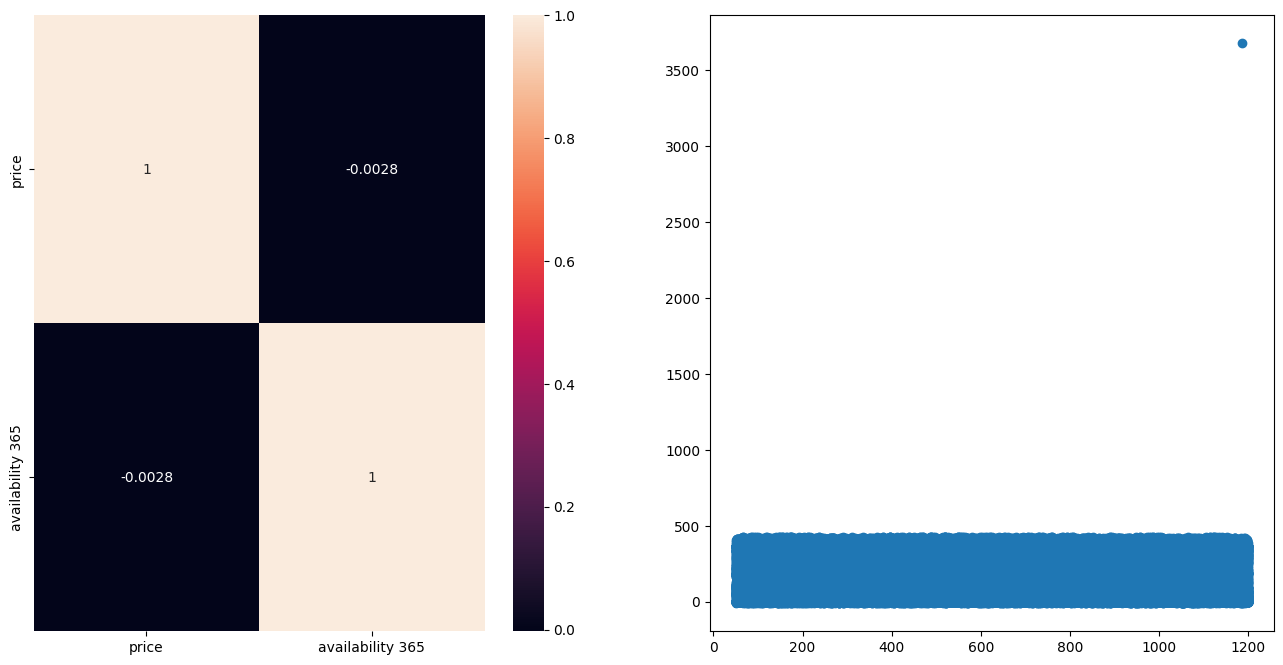

In [ ]:
price_df = data.loc[:, ['price', 'availability 365']]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))

sns.heatmap(price_df.corr(), annot=True, ax=ax1)
ax2.scatter(price_df['price'], price_df['availability 365'])

**Findings:**

- **Price and Availability 365 (Availability  for the Year) attributes are highly decorrelated**
- **In the scatter plot, there is an outlier for Availability 365 as shown in the box plot earlier**

# 9.1 Research Question 9

## 9.1 What is the cancellation policy for Manhattan Properties based on Room Types?

<ipython-input-120-d13798f02d8e>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



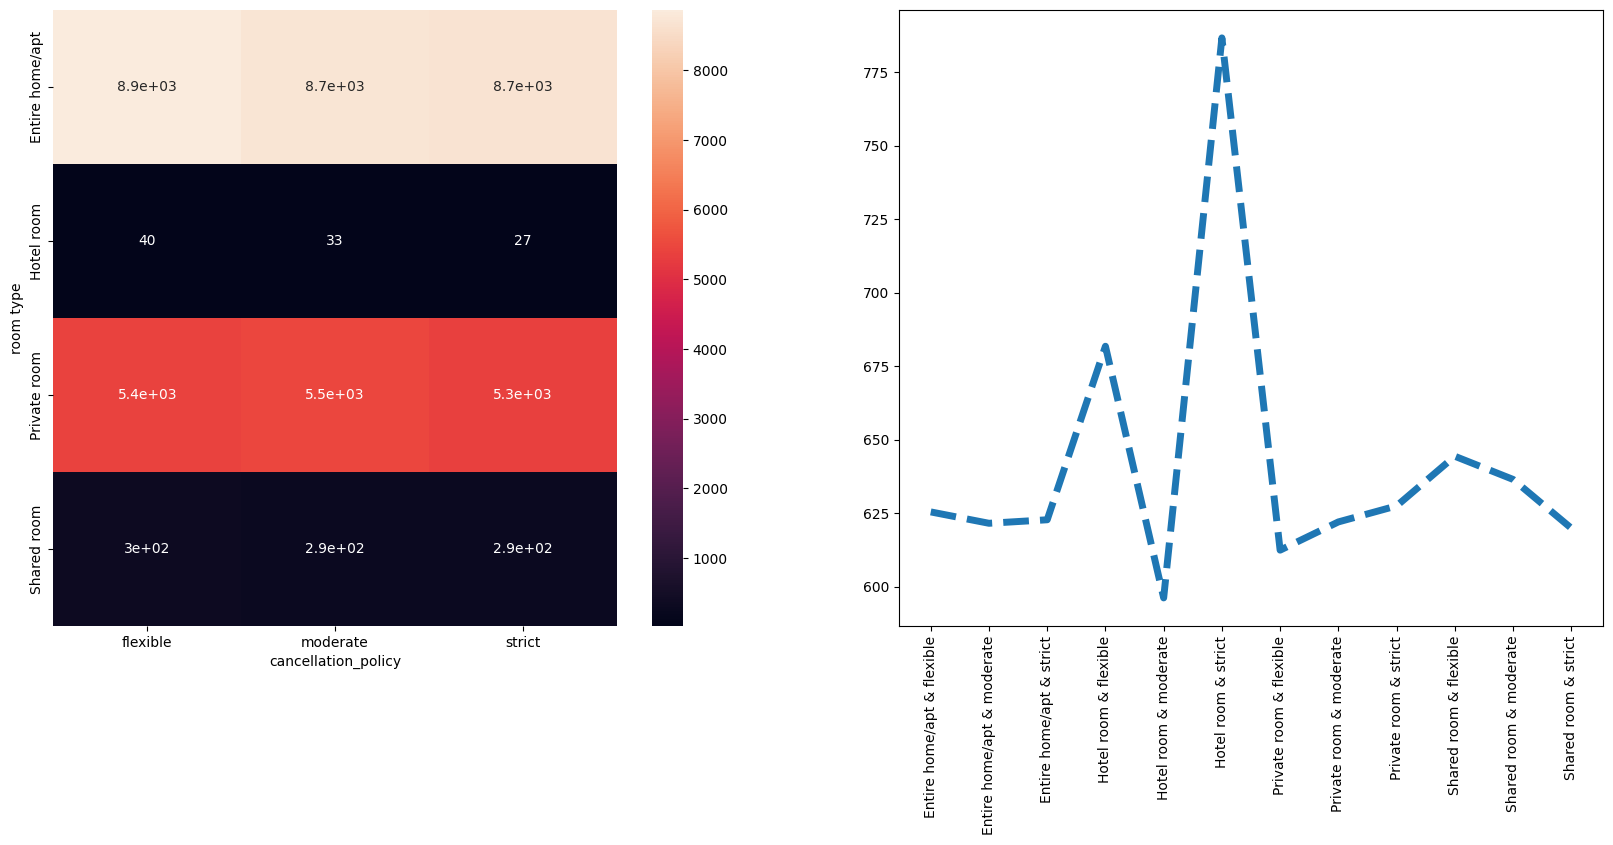

In [ ]:
manhattan_df = data.loc[data['neighbourhood group'] == 'Manhattan', ['room type', 'cancellation_policy', 'price']]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

crosstab_df = pd.crosstab(manhattan_df['room type'], manhattan_df['cancellation_policy'])

sns.heatmap(crosstab_df, annot=True, ax=ax1)
group_df = manhattan_df.groupby(['room type', 'cancellation_policy']).mean().reset_index()

group_df['new_attribute'] = group_df['room type'].astype('string') + " & " + group_df['cancellation_policy'].astype('string')
ax2.plot(group_df['new_attribute'], group_df['price'], ls='dashed', lw=5)
ax2.set_xticks(group_df['new_attribute'])
ax2.set_xticklabels(group_df['new_attribute'], rotation=90)
ax.legend()
plt.show()

# 10.1 Research Question 10

## 10.1 At what reviews per month are host listings calculated?

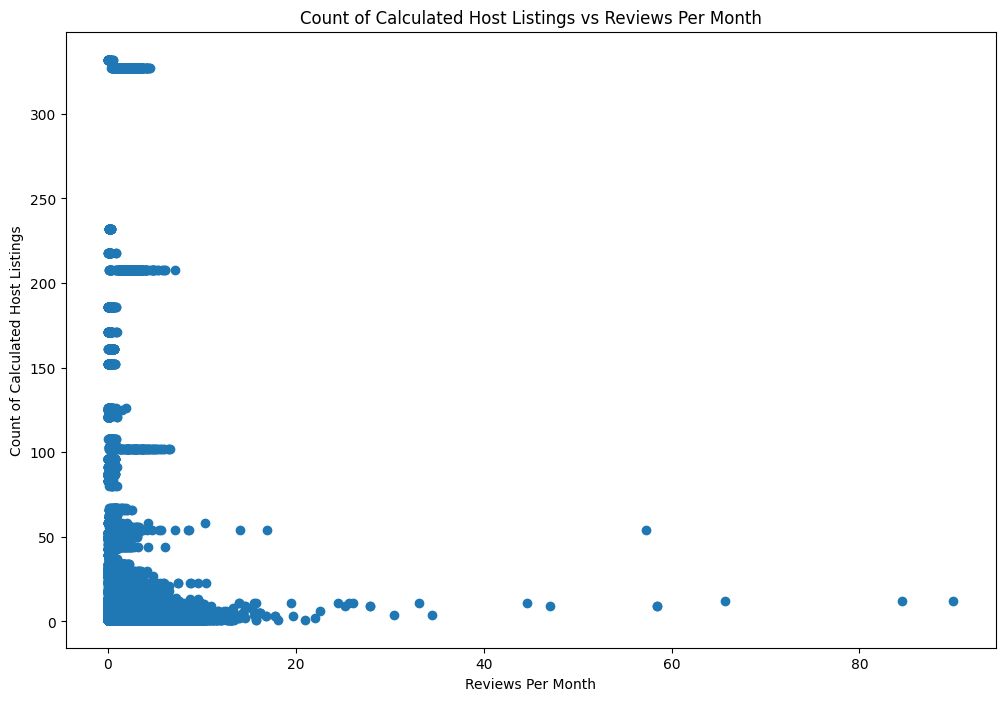

In [ ]:
price_df = data.loc[:, ['reviews per month', 'calculated host listings count']]

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.scatter(price_df['reviews per month'], price_df['calculated host listings count'])
ax.set(xlabel='Reviews Per Month', ylabel='Count of Calculated Host Listings')
ax.set_title("Count of Calculated Host Listings vs Reviews Per Month")
plt.show()

**Findings:**

- **At close to 0 to 2 reviews per month, the Host Listings Counts are Highly Calculated**
- **At a minimum Host Listings Count, the Reviews Per Month are seen as Maximum**